In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [4]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

DATE   Sales
0 2001-01-01  6519.0
1 2001-02-01  6654.0
2 2001-03-01  7332.0
3 2001-04-01  7332.0
4 2001-05-01  8240.0

In [5]:
mobile_sales.DATE.describe()

C:\Users\khush\AppData\Local\Temp\ipykernel_8600\20359885.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales.DATE.describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [6]:
18*12

216

In [7]:
# set the timeperiod as index 
mobile_sales.set_index('DATE', inplace=True)

<Axes: xlabel='DATE'>

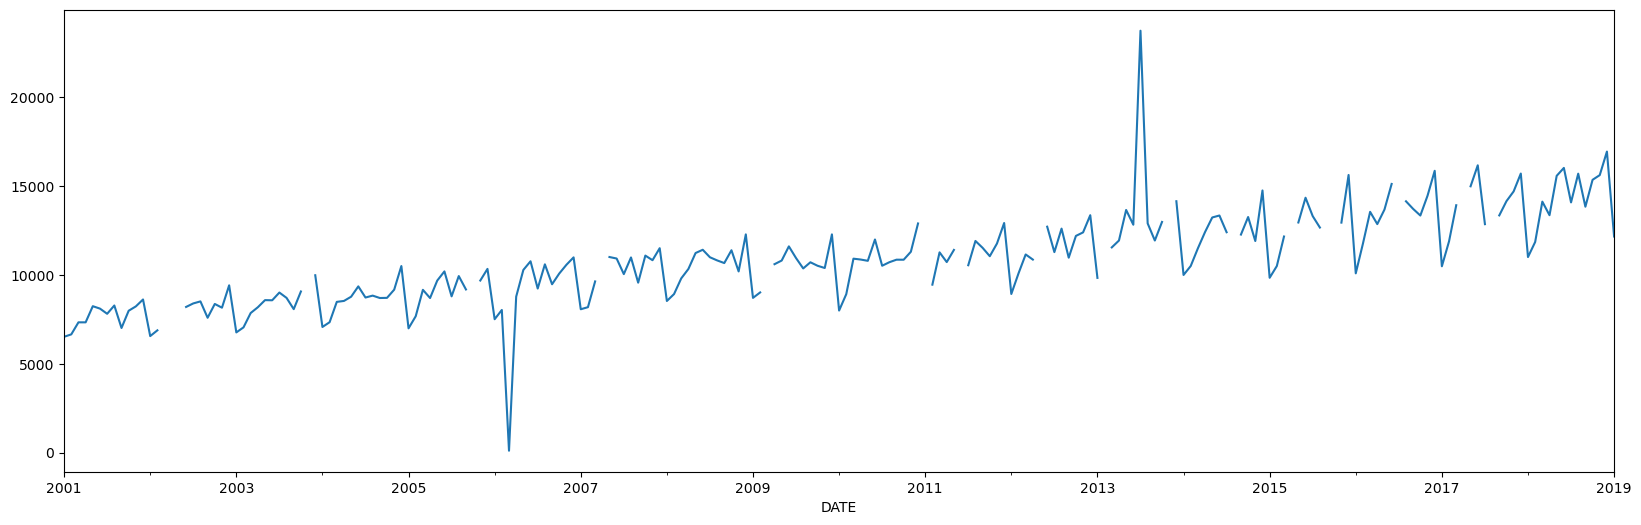

In [8]:
mobile_sales.Sales.plot()

In [9]:
mn = mobile_sales.Sales.mean()

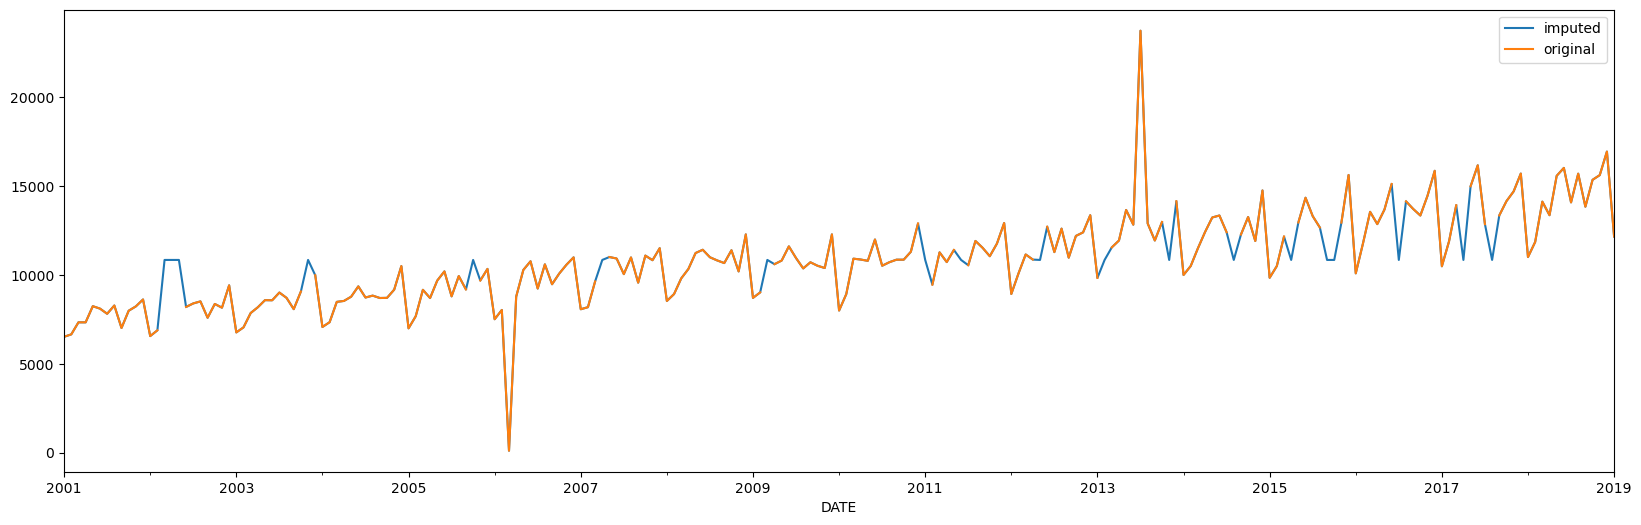

In [10]:
mobile_sales.Sales.fillna(mn).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

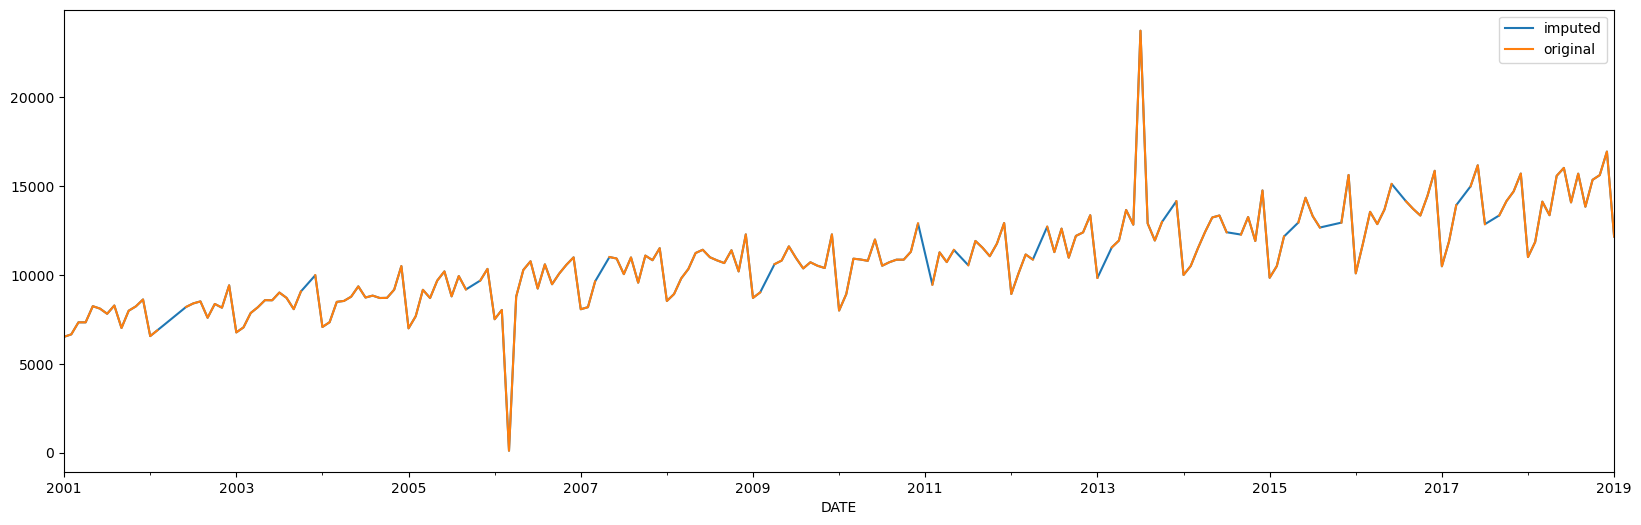

In [11]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

[]

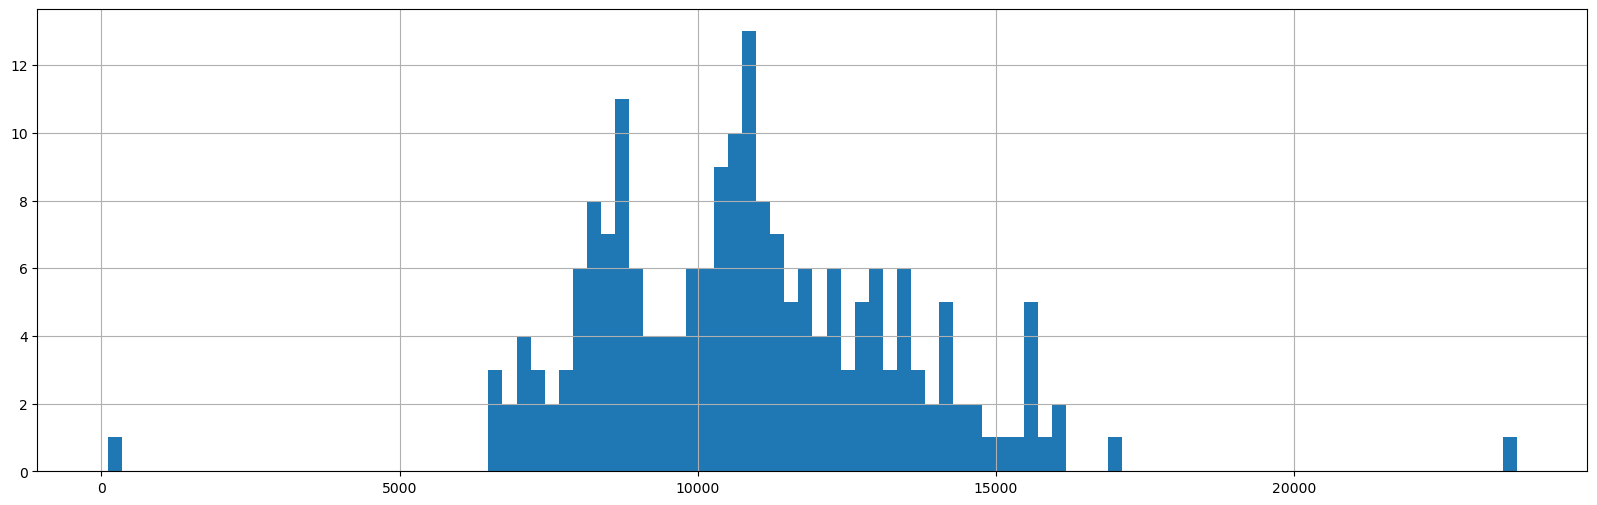

In [12]:
mobile_sales.Sales.hist(bins=100).plot()

In [13]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))

<Axes: xlabel='DATE'>

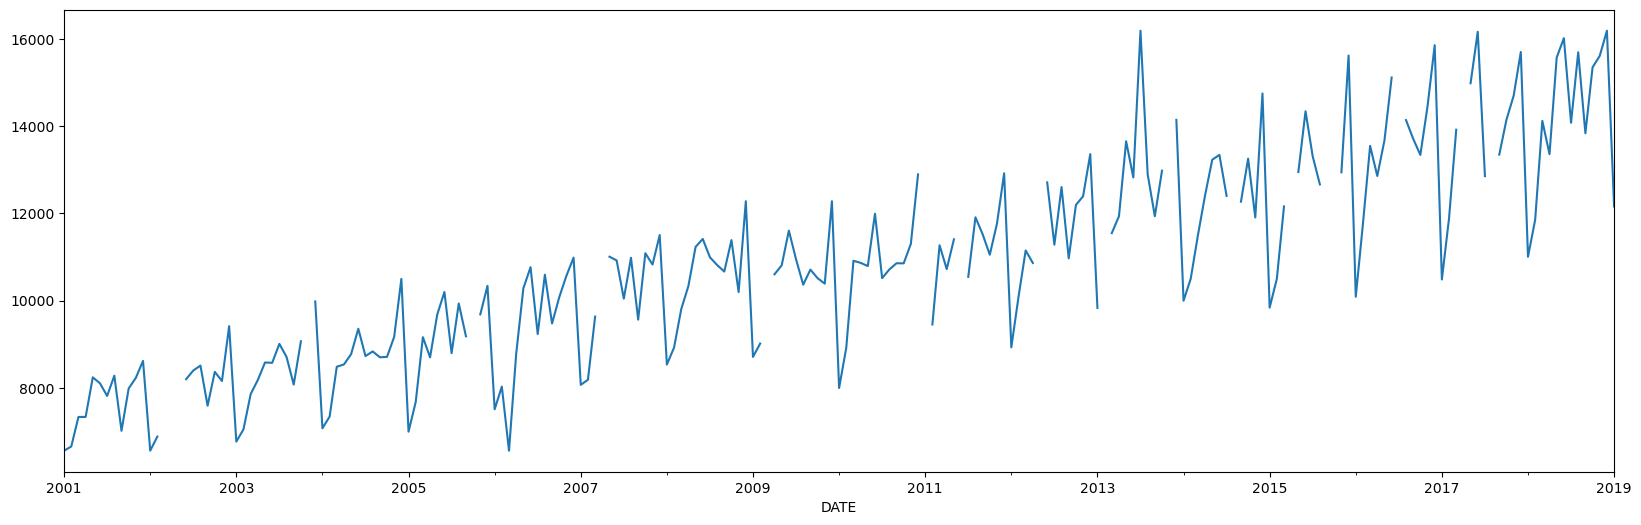

In [14]:
mobile_sales.Sales.plot(label='Clipped')

<Axes: xlabel='DATE'>

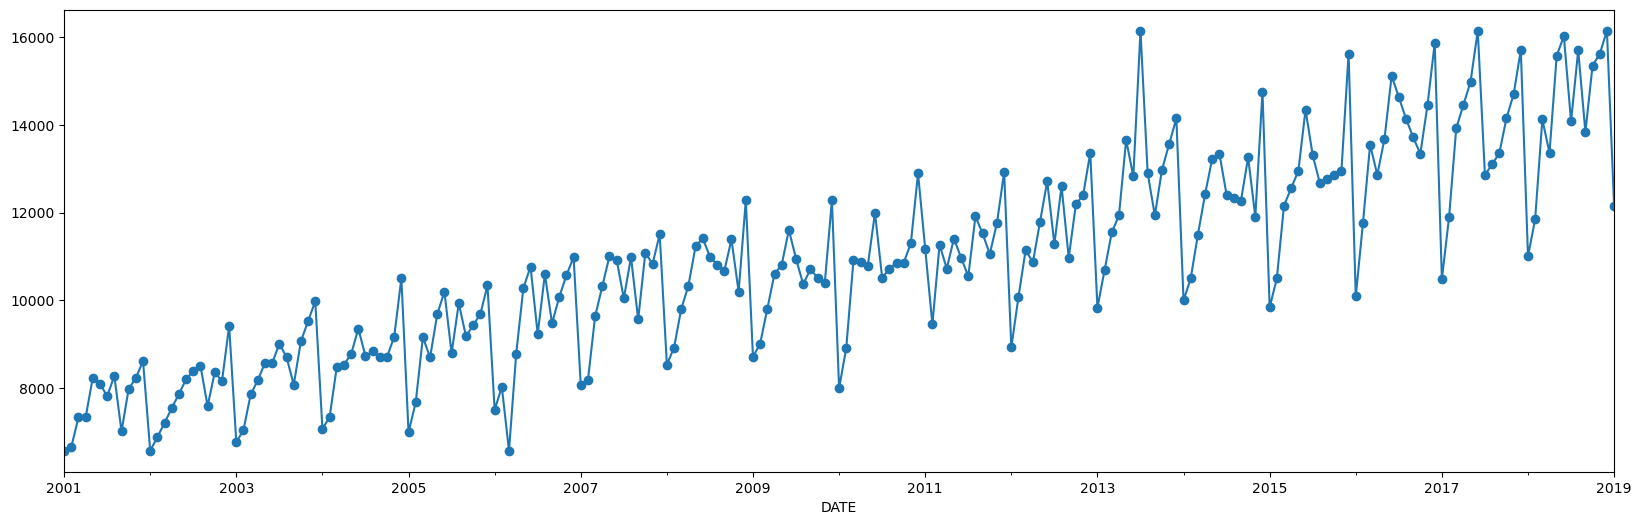

In [15]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.set_index('DATE', inplace=True)
mobile_sales.Sales = mobile_sales.Sales.interpolate()
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))
mobile_sales.Sales.plot(style='-o')

<Axes: xlabel='DATE'>

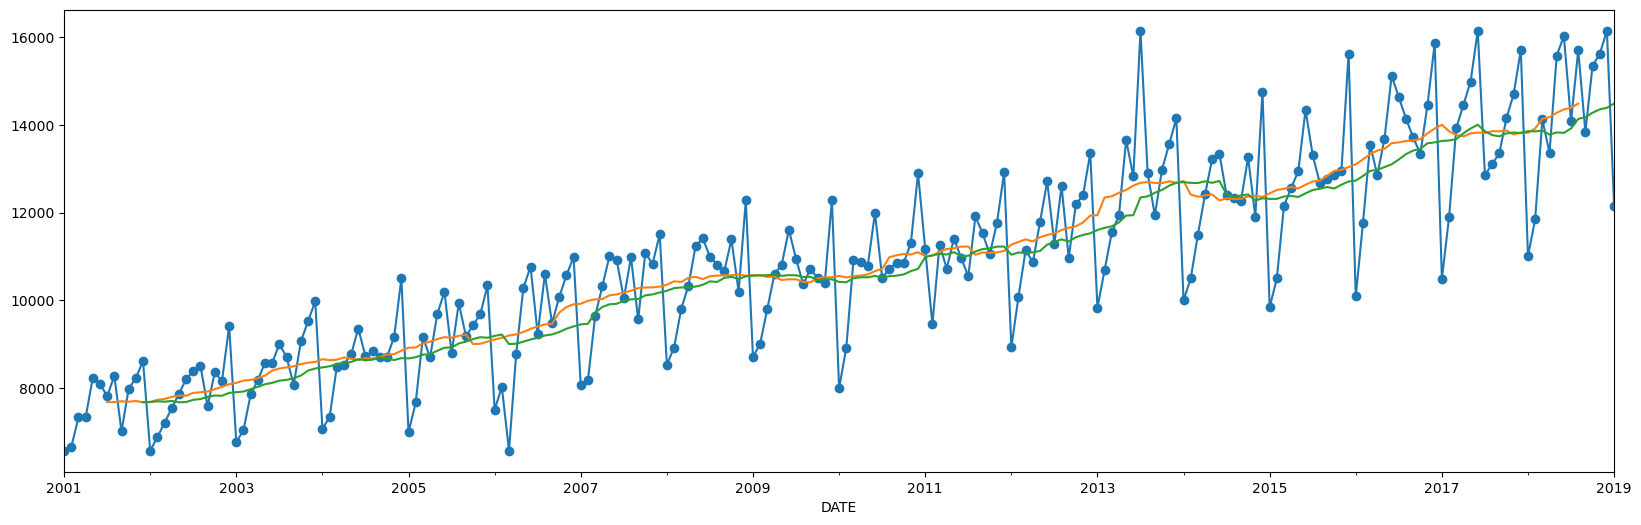

In [16]:
mobile_sales.Sales.plot(style='-o')
mobile_sales.Sales.rolling(12, center=True).mean().plot()
mobile_sales.Sales.rolling(12, center=False).mean().plot()

In [17]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

In [18]:
plt.rcParams['figure.figsize'] = (20, 10)

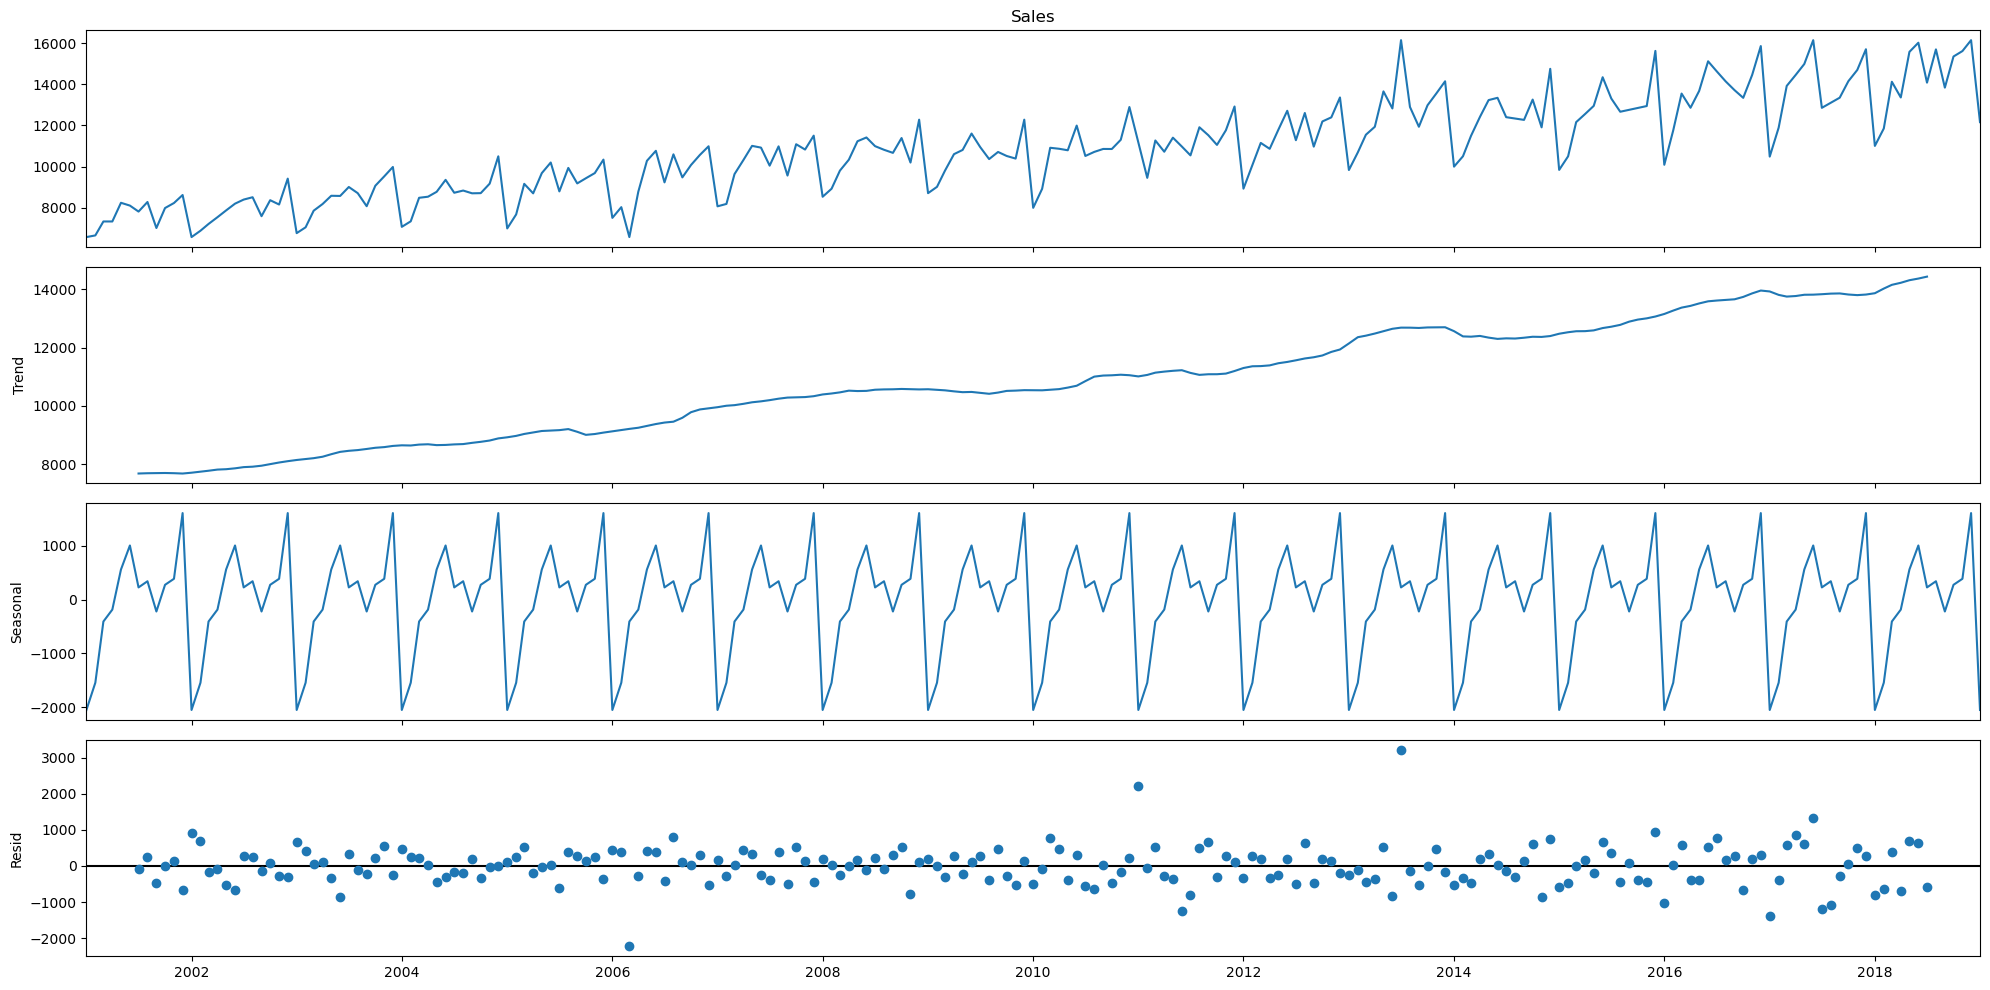

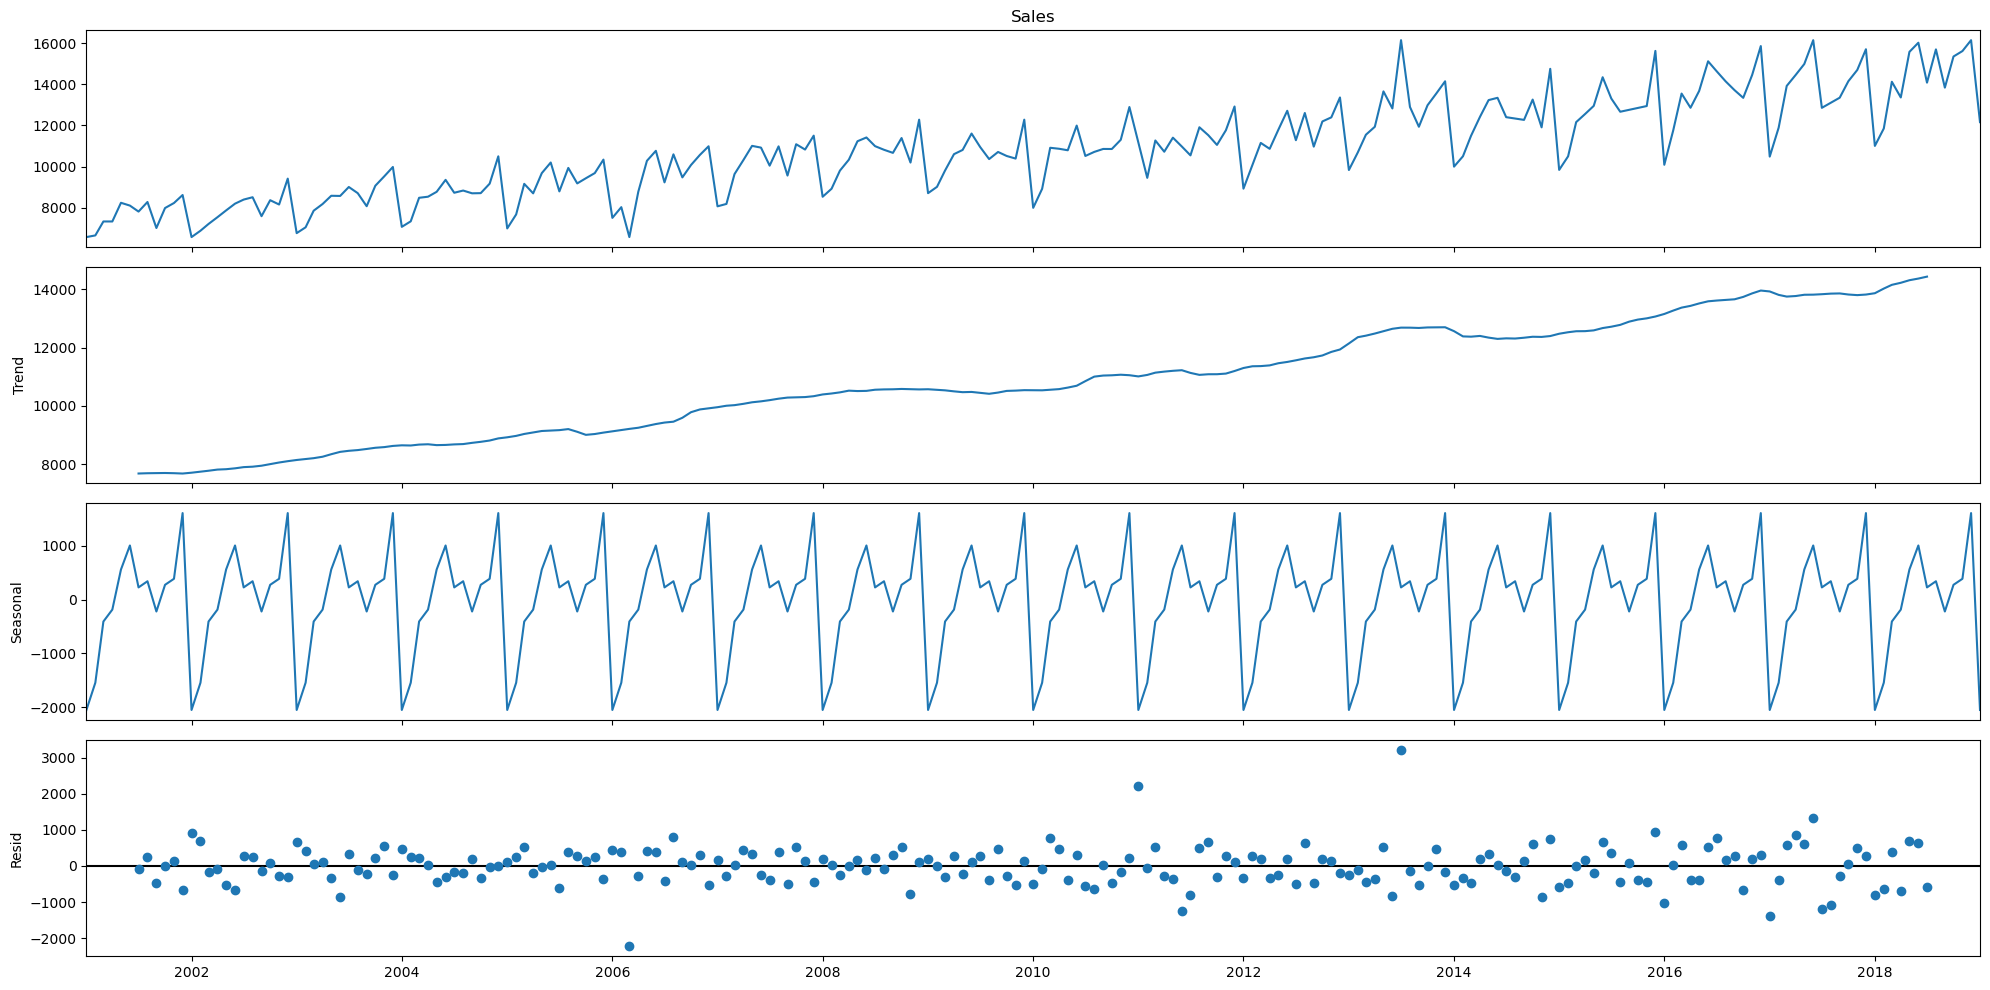

In [19]:
model.plot()

In [20]:
model.trend[-10:-5]

DATE
2018-04-01    14225.375000
2018-05-01    14313.625000
2018-06-01    14370.186667
2018-07-01    14436.665000
2018-08-01             NaN
Name: trend, dtype: float64

In [21]:
model.seasonal[-10:-5]

DATE
2018-04-01    -185.047675
2018-05-01     559.648403
2018-06-01    1006.155854
2018-07-01     227.369231
2018-08-01     341.476835
Name: seasonal, dtype: float64

In [22]:
model.resid[-10:-5]

DATE
2018-04-01   -680.327325
2018-05-01    702.726597
2018-06-01    644.657479
2018-07-01   -584.034231
2018-08-01           NaN
Name: resid, dtype: float64

In [23]:
mobile_sales.Sales[-10:-5]

DATE
2018-04-01    13360.0
2018-05-01    15576.0
2018-06-01    16021.0
2018-07-01    14080.0
2018-08-01    15697.0
Name: Sales, dtype: float64

In [24]:
14225.375000 - 185.047675 -680.327325

13360.0

In [25]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='multiplicative')

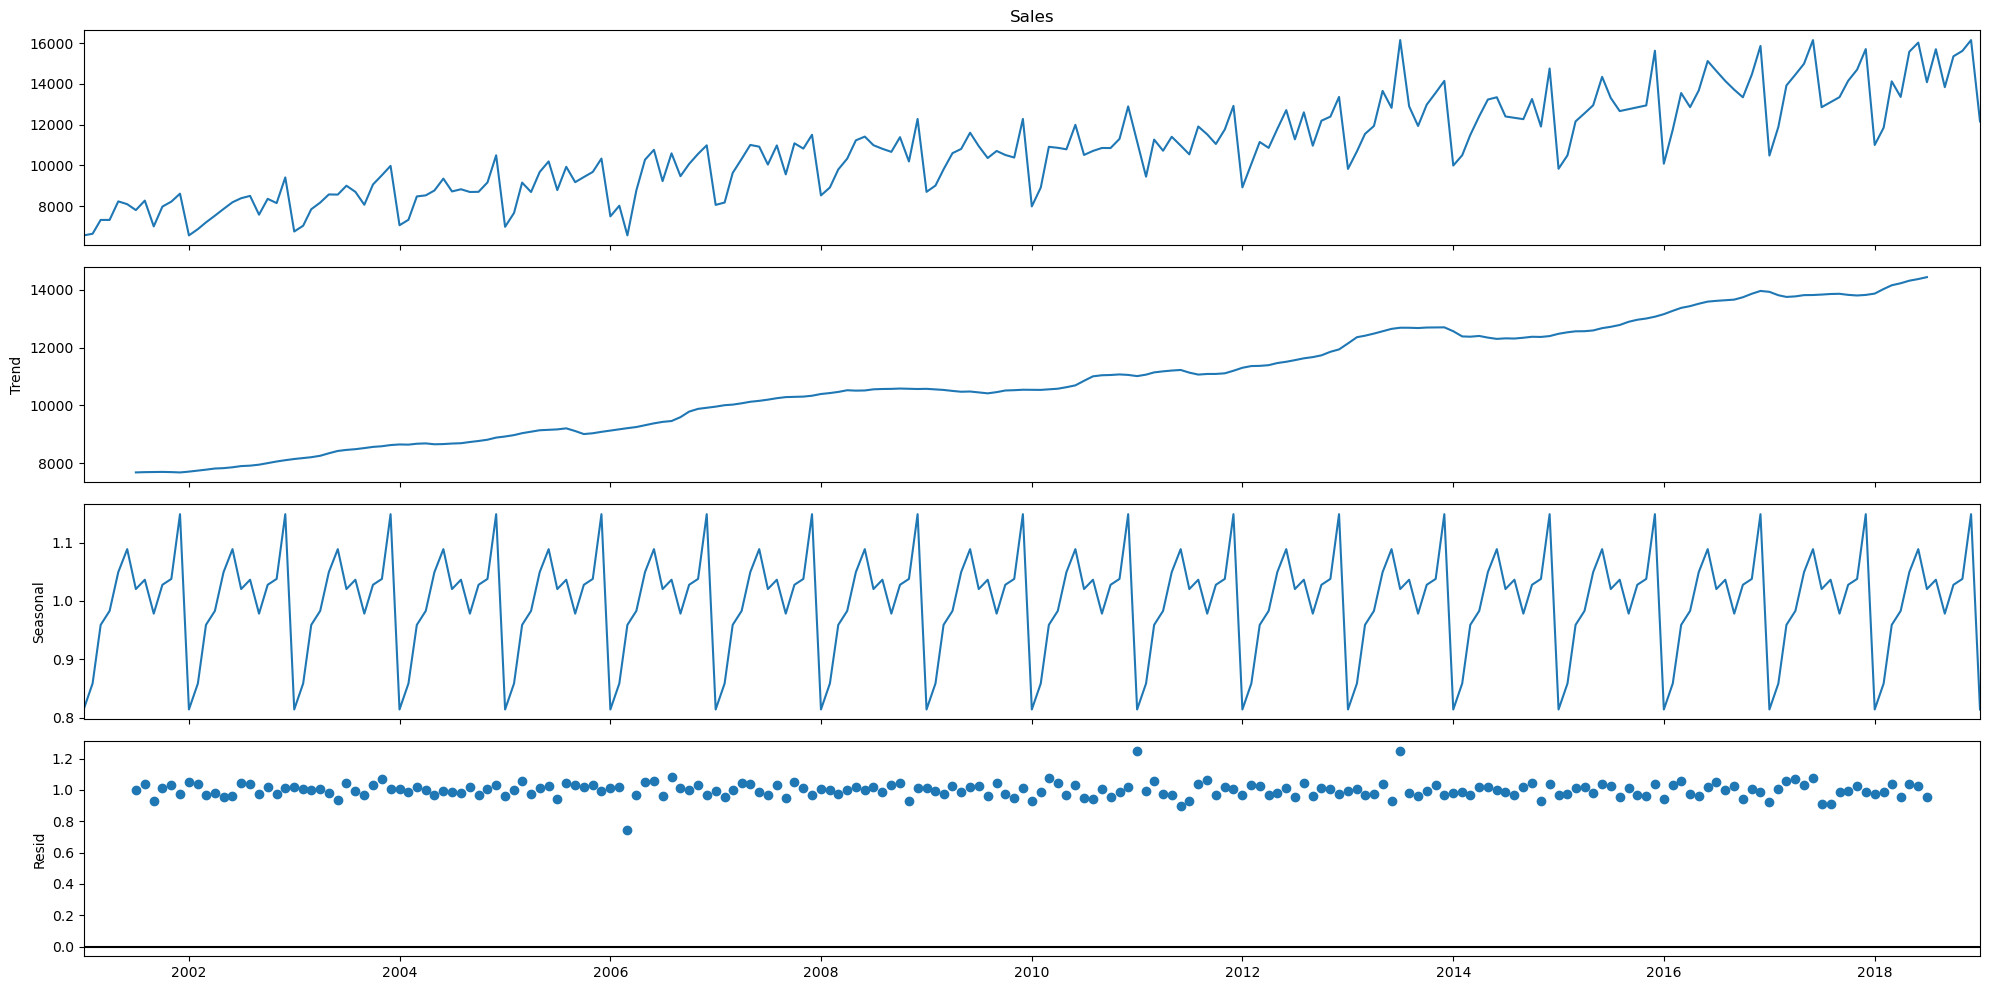

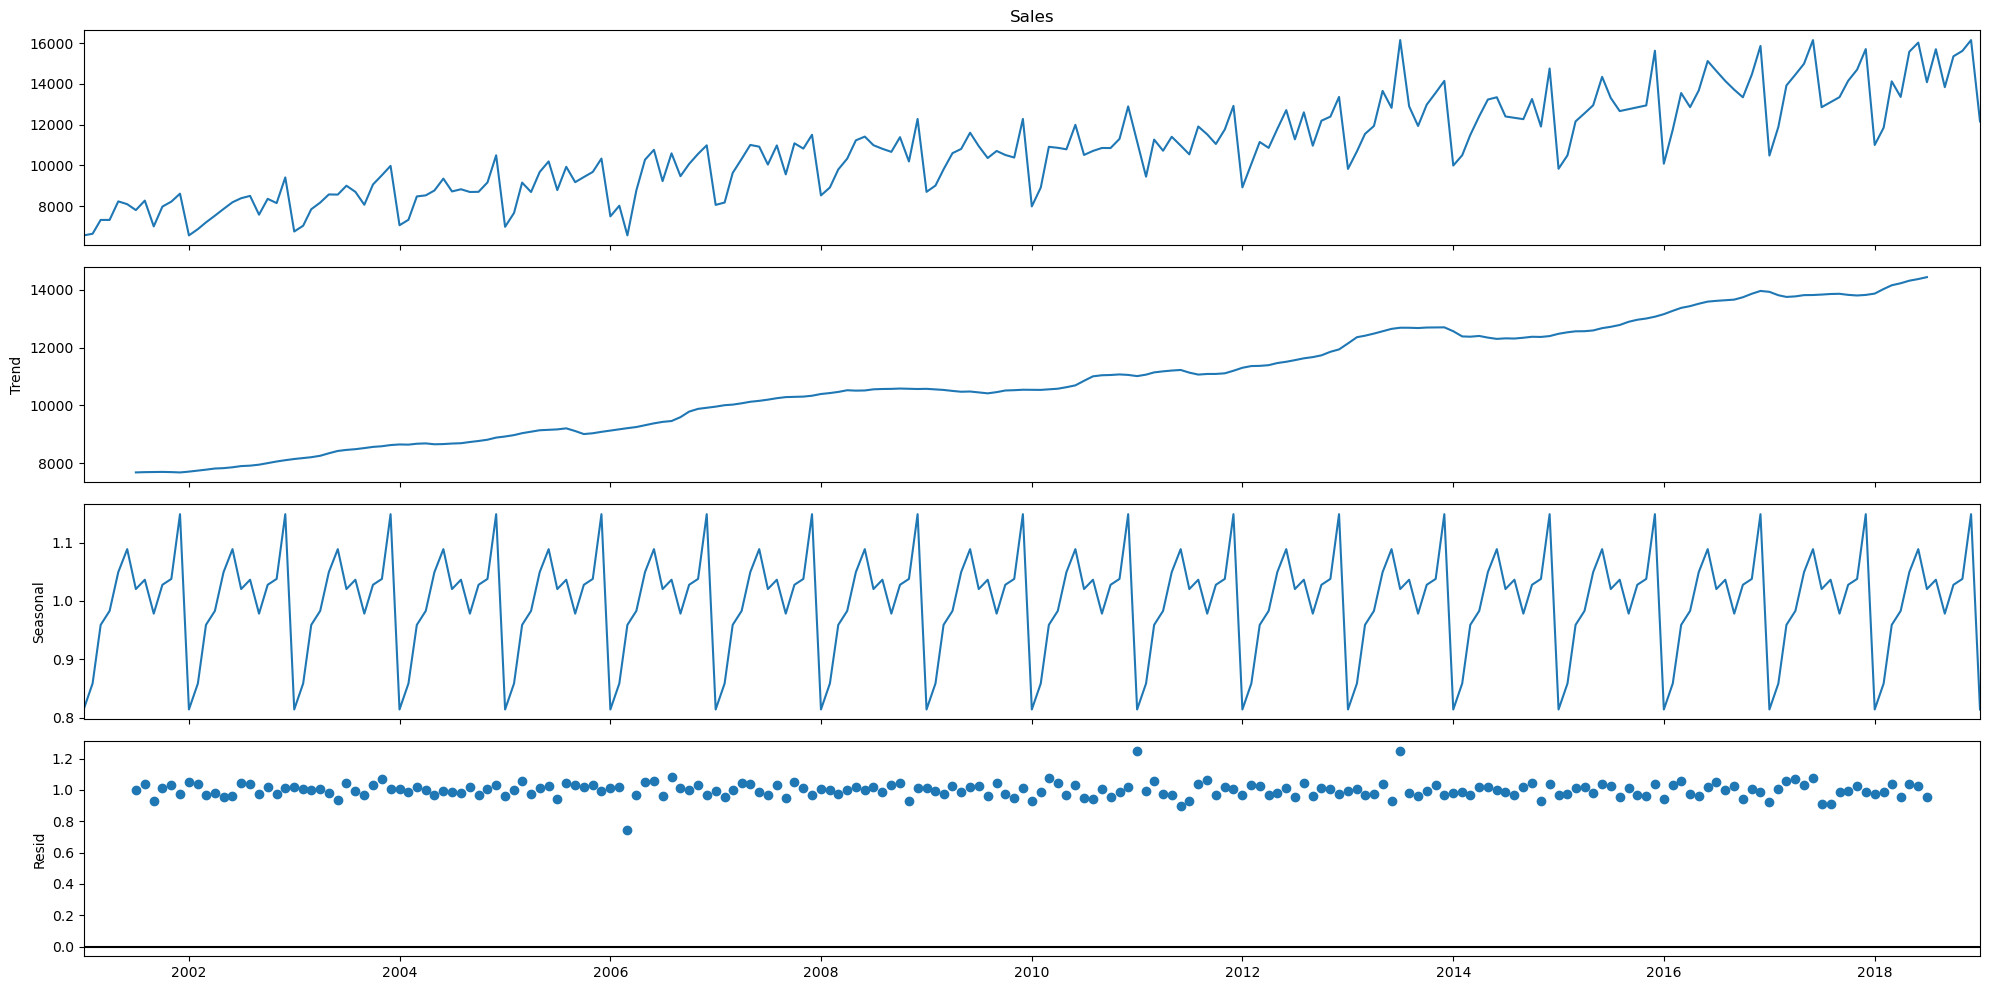

In [26]:
model.plot()

In [27]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

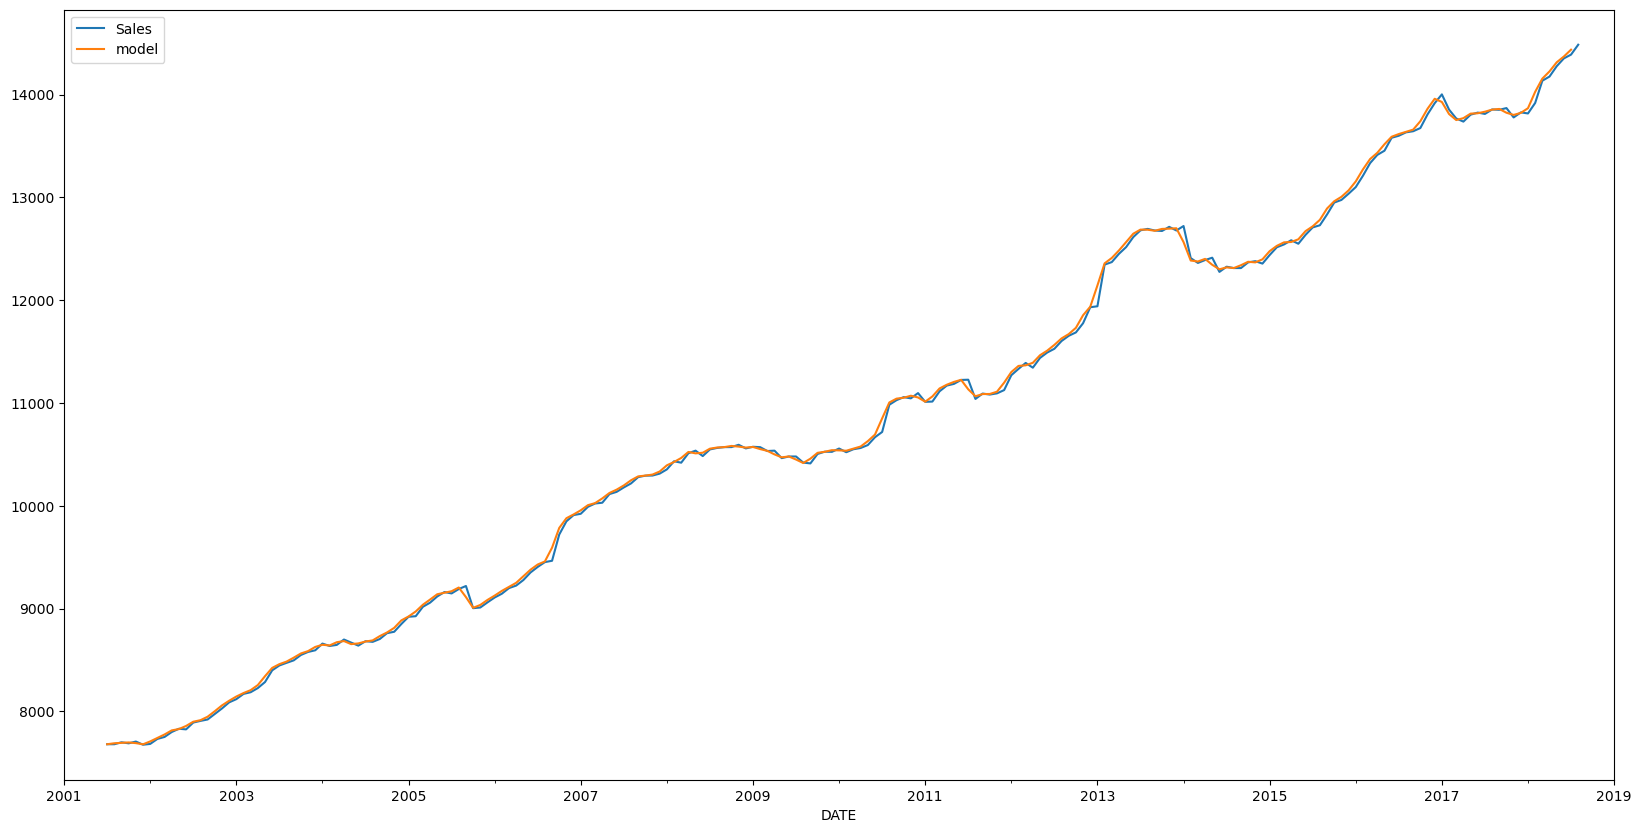

In [28]:
trend = mobile_sales.rolling(12, center=True).mean()
trend.plot(label = "ma")
model.trend.plot(label = "model")
plt.legend()

<Axes: xlabel='DATE'>

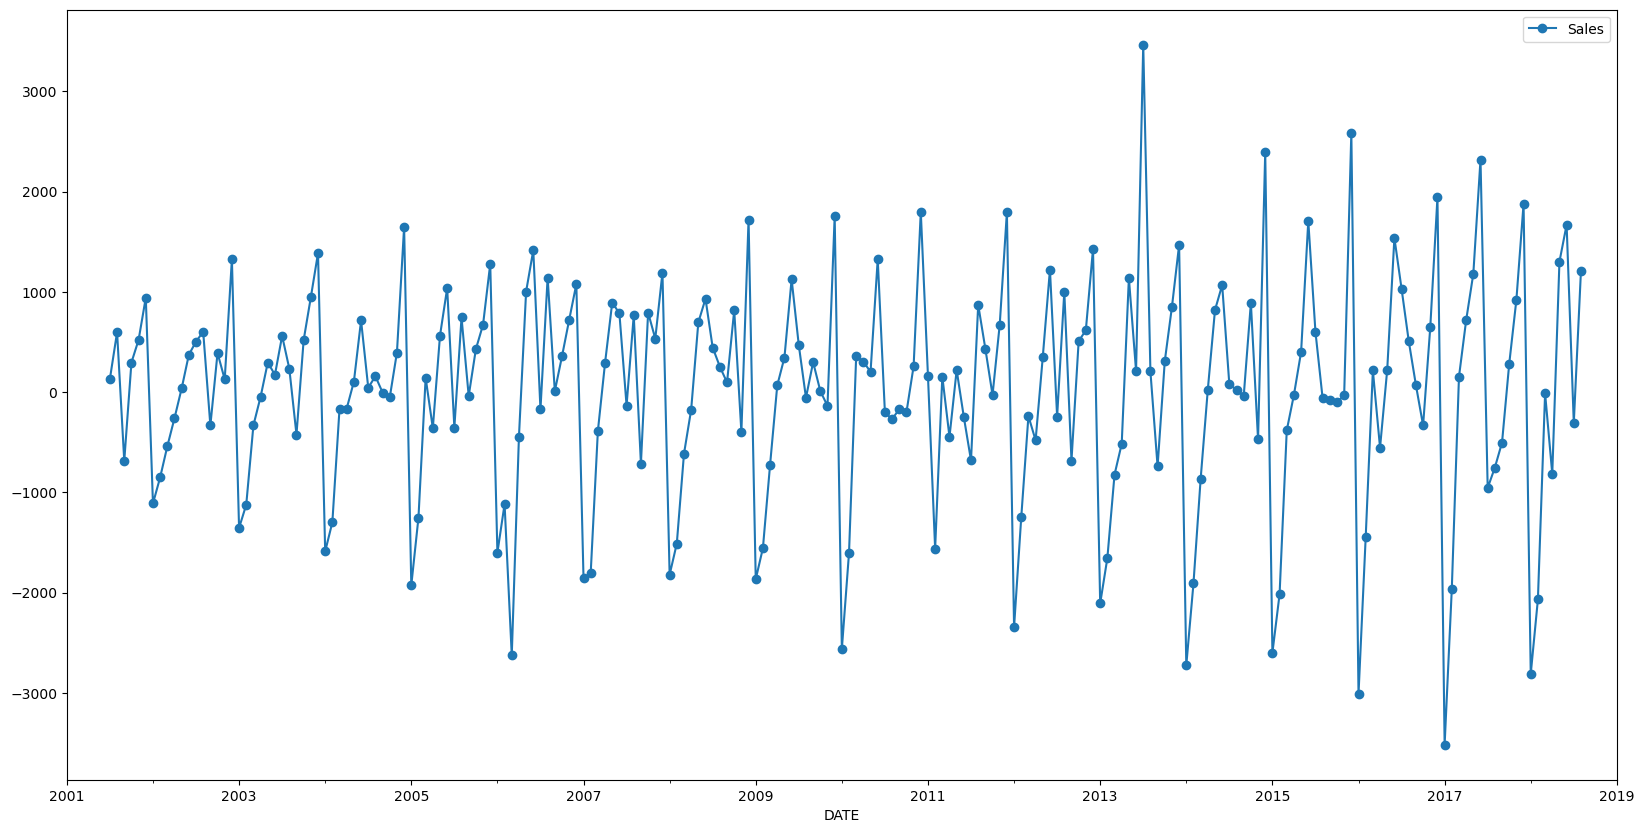

In [29]:
de_trend = mobile_sales - trend
de_trend.plot(style = "o-")

<Axes: xlabel='DATE'>

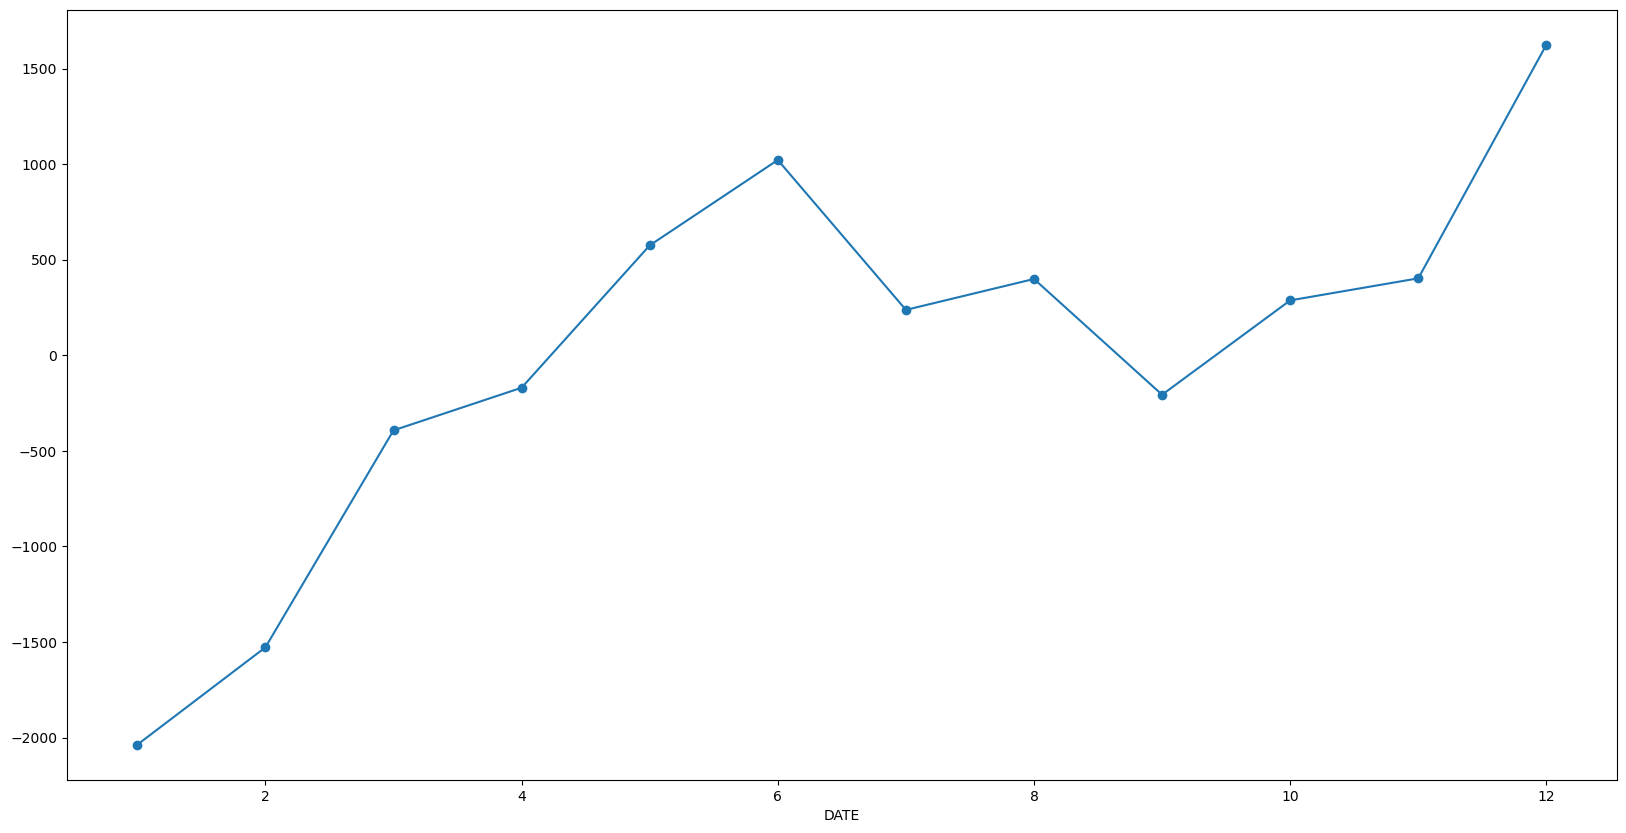

In [30]:
dtf = de_trend.reset_index()
dtf.groupby(dtf.DATE.dt.month)['Sales'].mean().plot(style='-o')

<Axes: xlabel='DATE'>

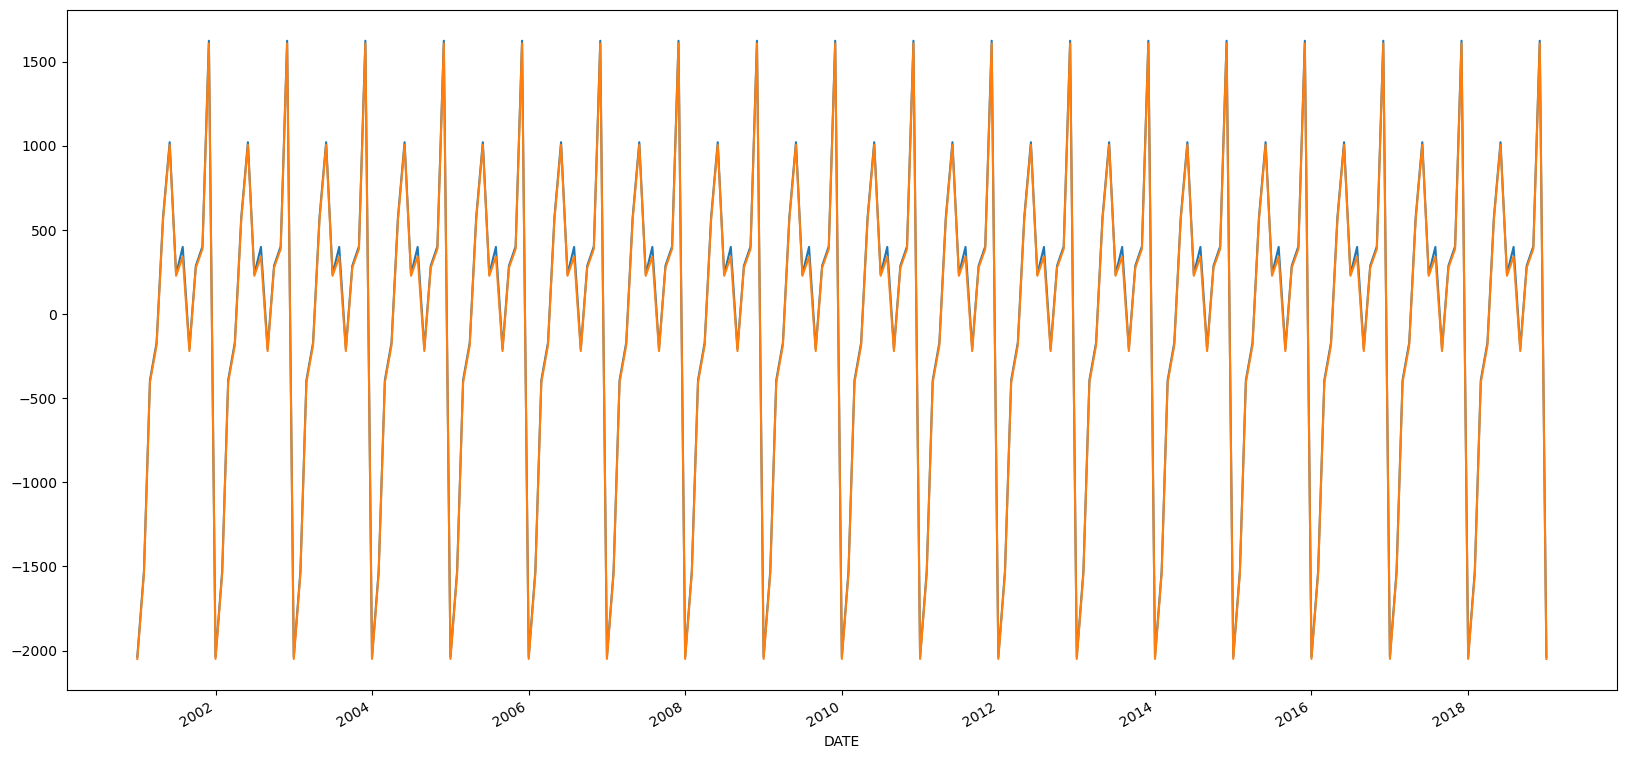

In [31]:
plt.plot(dtf.DATE, dtf.groupby(dtf.DATE.dt.month)['Sales'].transform('mean'))
model.seasonal.plot()

## SImple forecasting methods in action , train vs test performance 

In [32]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted)*100, 3))

In [33]:
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

test_x

Sales
DATE                
2018-02-01  11852.00
2018-03-01  14123.00
2018-04-01  13360.00
2018-05-01  15576.00
2018-06-01  16021.00
2018-07-01  14080.00
2018-08-01  15697.00
2018-09-01  13838.00
2018-10-01  15351.00
2018-11-01  15615.00
2018-12-01  16144.48
2019-01-01  12160.00

MAE : 3479.79
RMSE : 3757.483
MAPE: 23.24


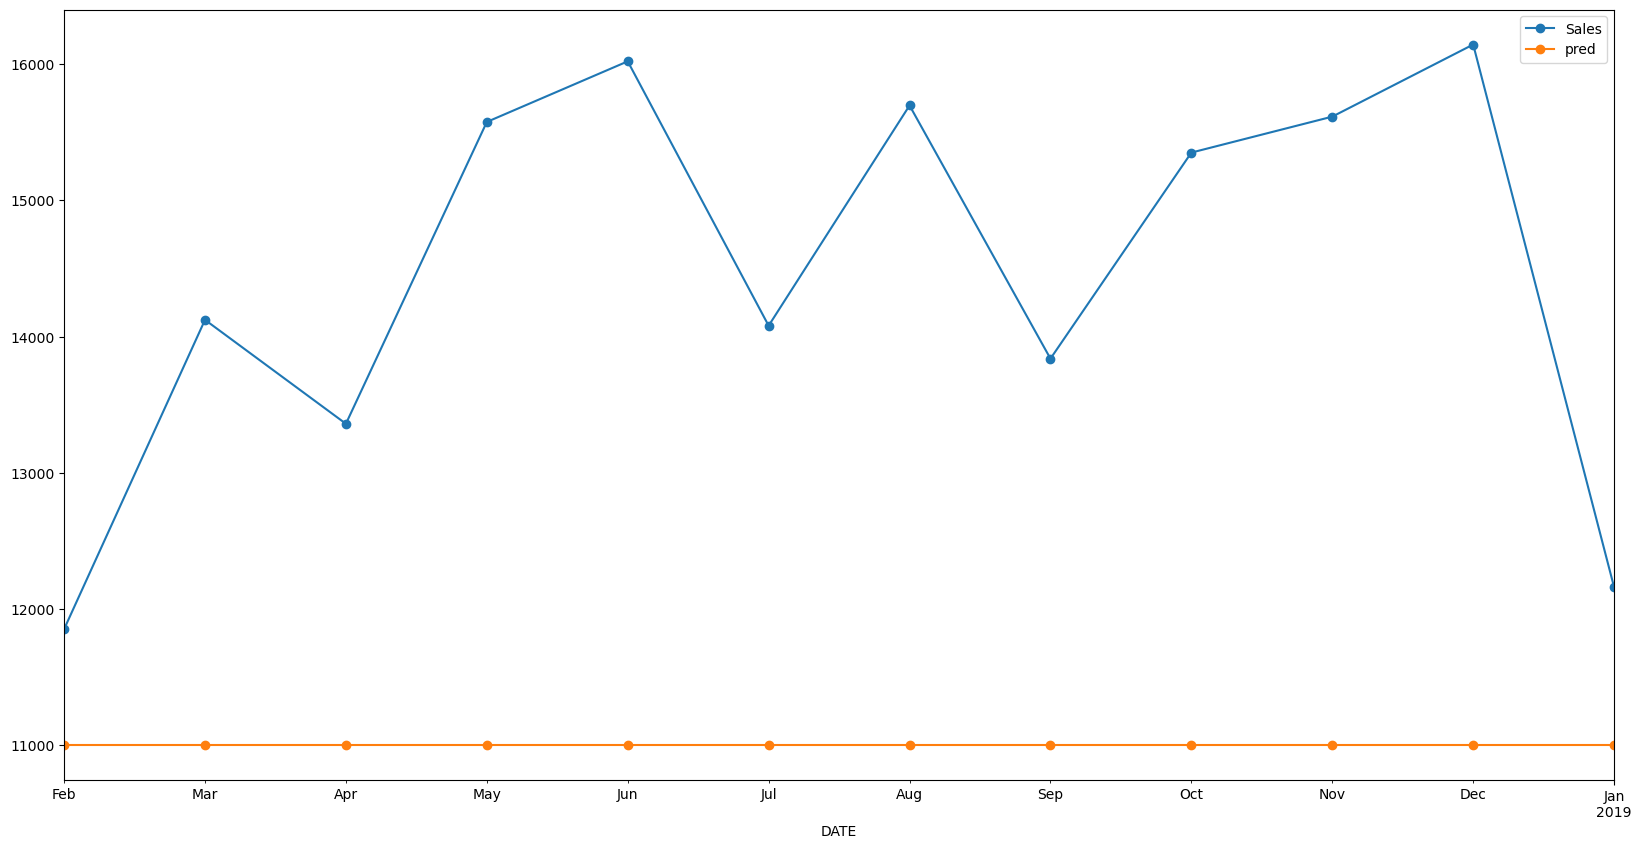

In [34]:
test_x['pred'] = train_x['Sales'][-1]

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

MAE : 3832.336
RMSE : 4086.14
MAPE: 25.699


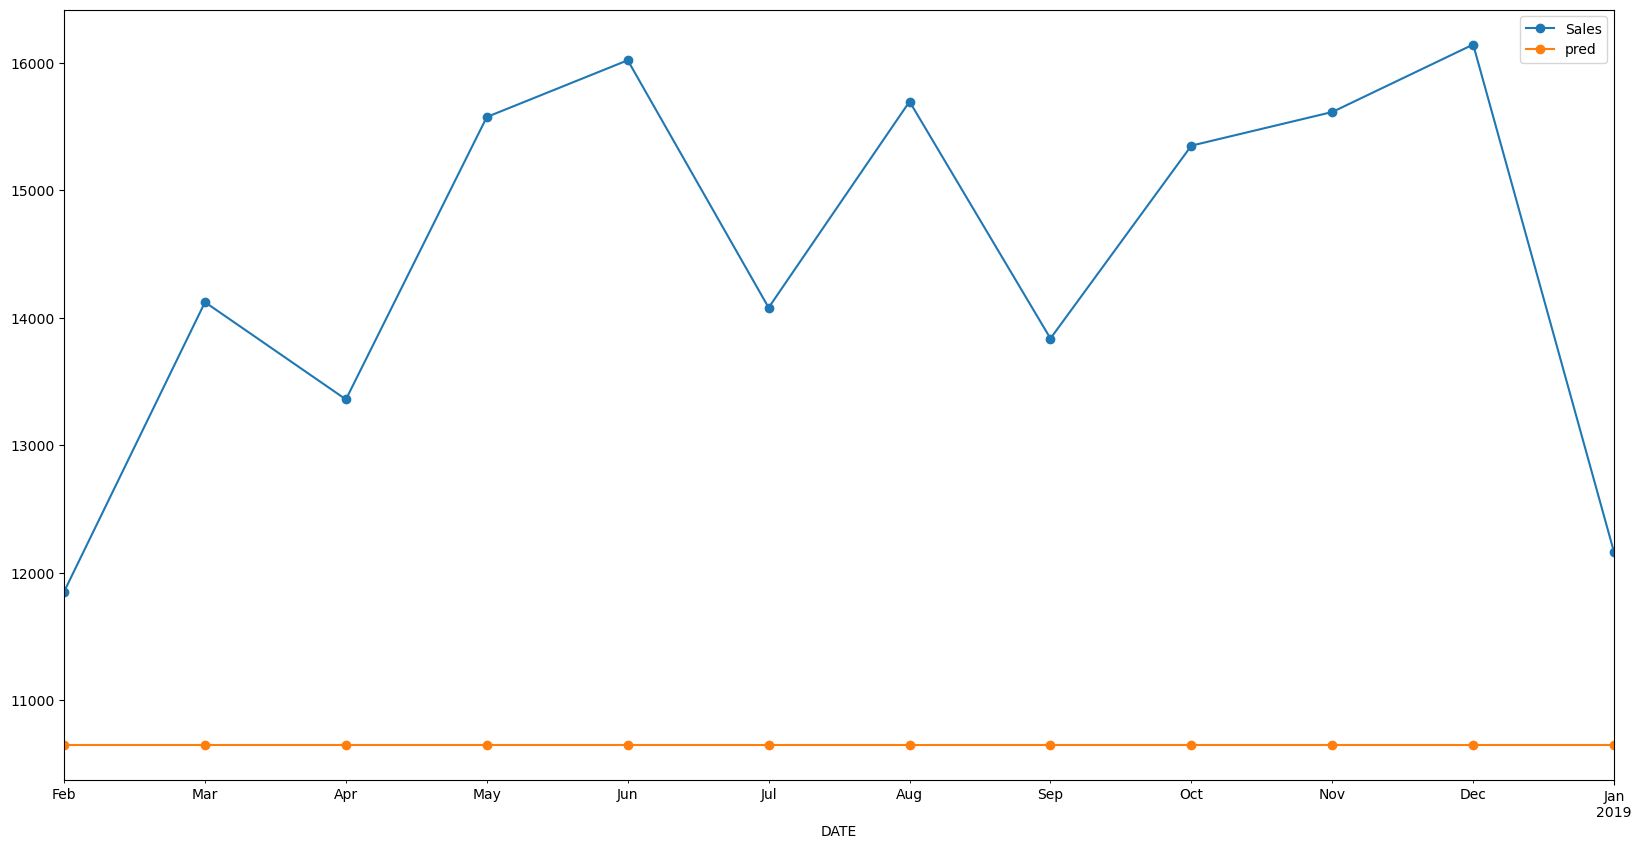

In [35]:
# Global mean or entire train data mean 
test_x['pred'] = train_x['Sales'].mean()

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [36]:
test_x.index

DatetimeIndex(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

MAE : 839.08
RMSE : 1075.542
MAPE: 5.765


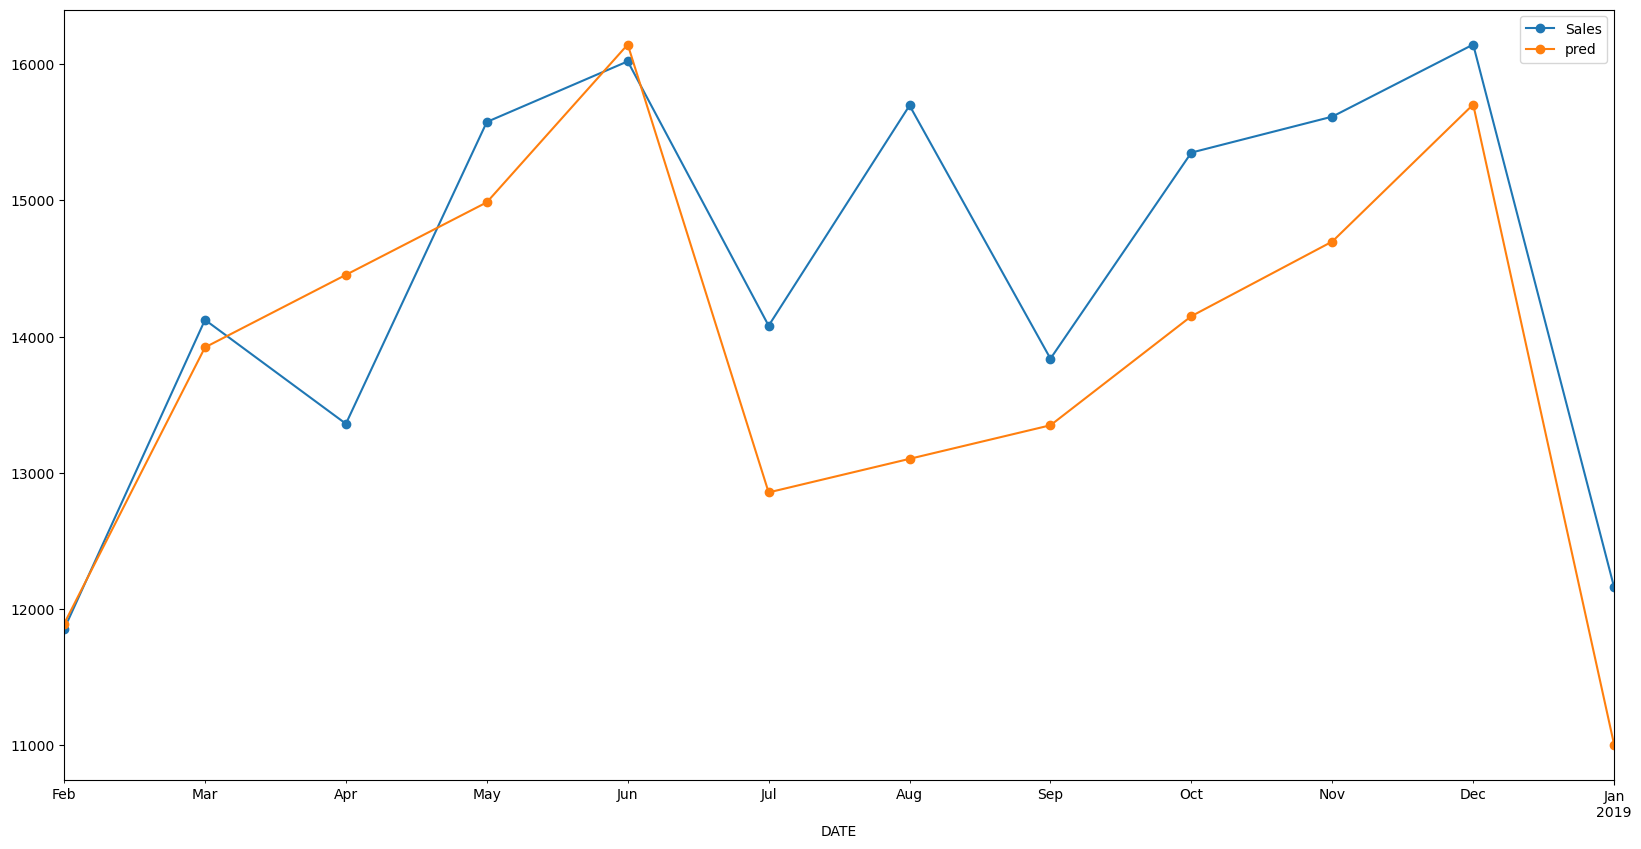

In [37]:
# Seasonal naive method 

for i in test_x.index:
    test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)].Sales

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

MAE : 3360.892
RMSE : 3640.673
MAPE: 22.424


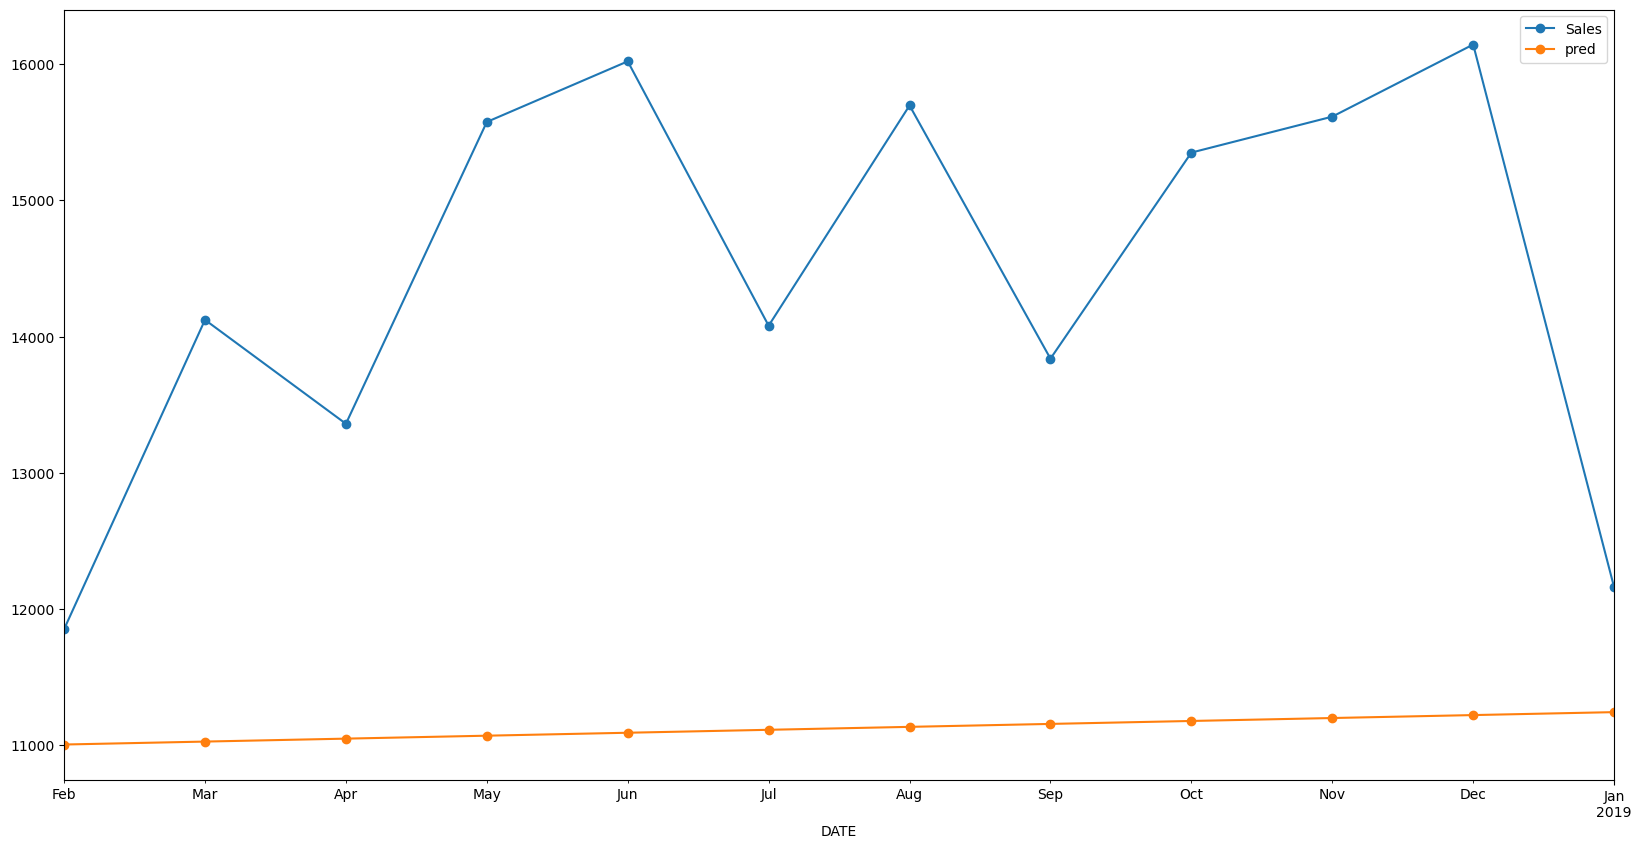

In [38]:
## Drift method 

y_t = train_x['Sales'][-1]
y_0 = train_x['Sales'][0]

m = (y_t - y_0) / len(train_x['Sales'])
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

## Simple exponetial smoothing 

In [39]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales)
_ = model.fit(smoothing_level = 0.6)
_.fittedvalues

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


DATE
2001-01-01     6573.360000
2001-02-01     6573.360000
2001-03-01     6621.744000
2001-04-01     7047.897600
2001-05-01     7218.359040
                  ...     
2018-09-01    15275.399887
2018-10-01    14412.959955
2018-11-01    14975.783982
2018-12-01    15359.313593
2019-01-01    15830.413437
Length: 217, dtype: float64

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


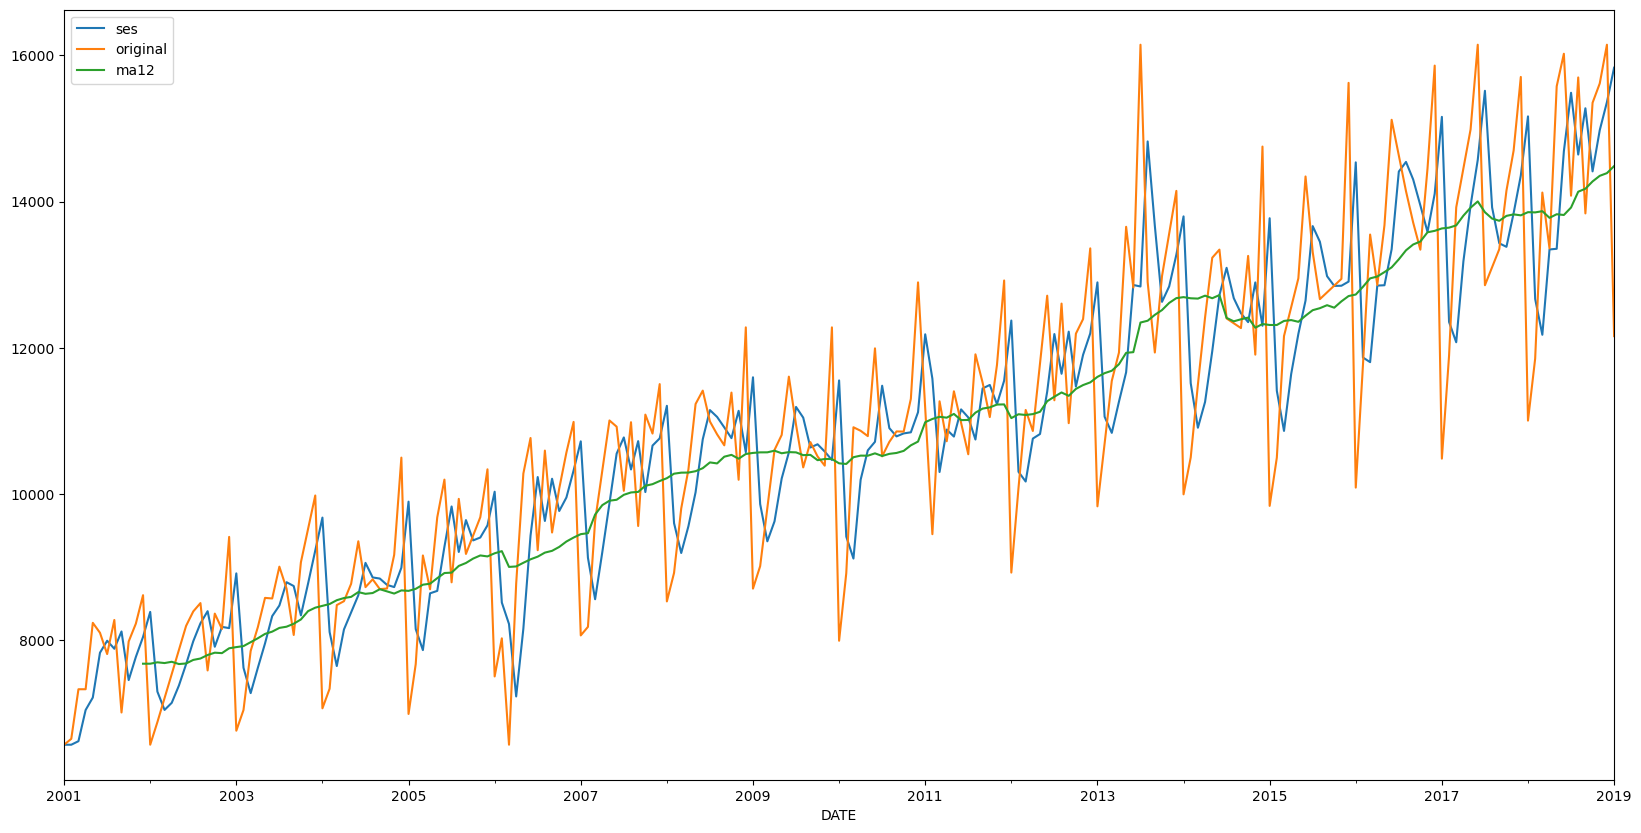

In [40]:
pred = pd.Series(sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.6).fittedvalues)

pred.plot(label='ses')
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12).mean().plot(label='ma12')
plt.legend()

In [41]:
## mape on entire training data 
mape(mobile_sales.Sales, pred)*100

9.35218552957409

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


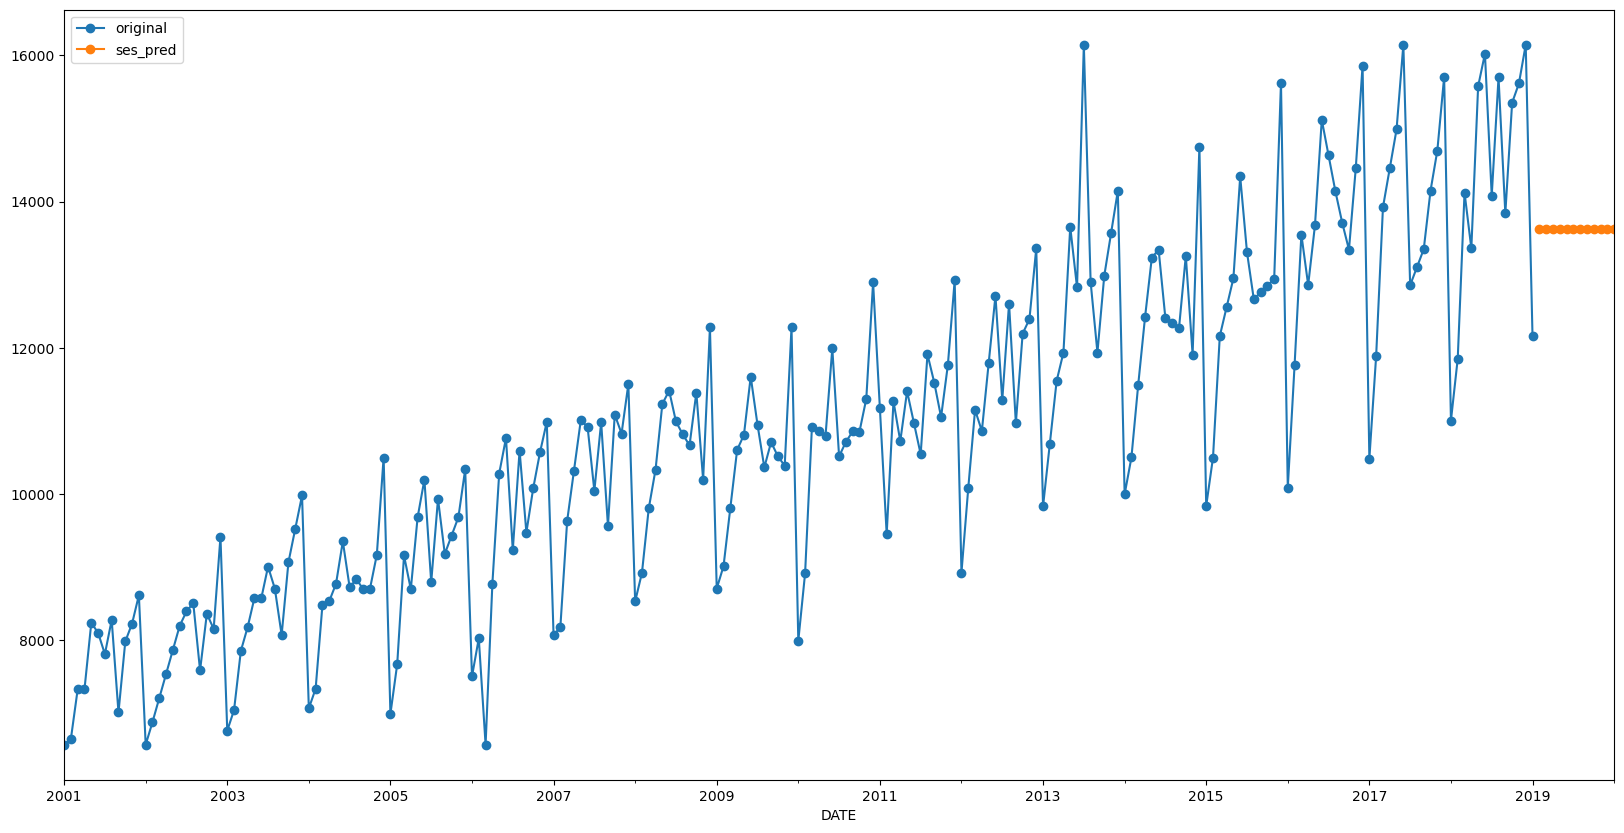

In [42]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.6)
pred = model.forecast(12)

mobile_sales.Sales.plot(label='original', style='-o')
pred.plot(label='ses_pred', style='-o')
plt.legend()

In [43]:
pred

2019-02-01    13628.165375
2019-03-01    13628.165375
2019-04-01    13628.165375
2019-05-01    13628.165375
2019-06-01    13628.165375
2019-07-01    13628.165375
2019-08-01    13628.165375
2019-09-01    13628.165375
2019-10-01    13628.165375
2019-11-01    13628.165375
2019-12-01    13628.165375
2020-01-01    13628.165375
Freq: MS, dtype: float64

In [44]:
test_x

Sales          pred
DATE                              
2018-02-01  11852.00  11005.000000
2018-03-01  14123.00  11026.617756
2018-04-01  13360.00  11048.235512
2018-05-01  15576.00  11069.853268
2018-06-01  16021.00  11091.471024
2018-07-01  14080.00  11113.088780
2018-08-01  15697.00  11134.706537
2018-09-01  13838.00  11156.324293
2018-10-01  15351.00  11177.942049
2018-11-01  15615.00  11199.559805
2018-12-01  16144.48  11221.177561
2019-01-01  12160.00  11242.795317

In [45]:
mape(test_x.Sales,pred )*100

9.78751384570306

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


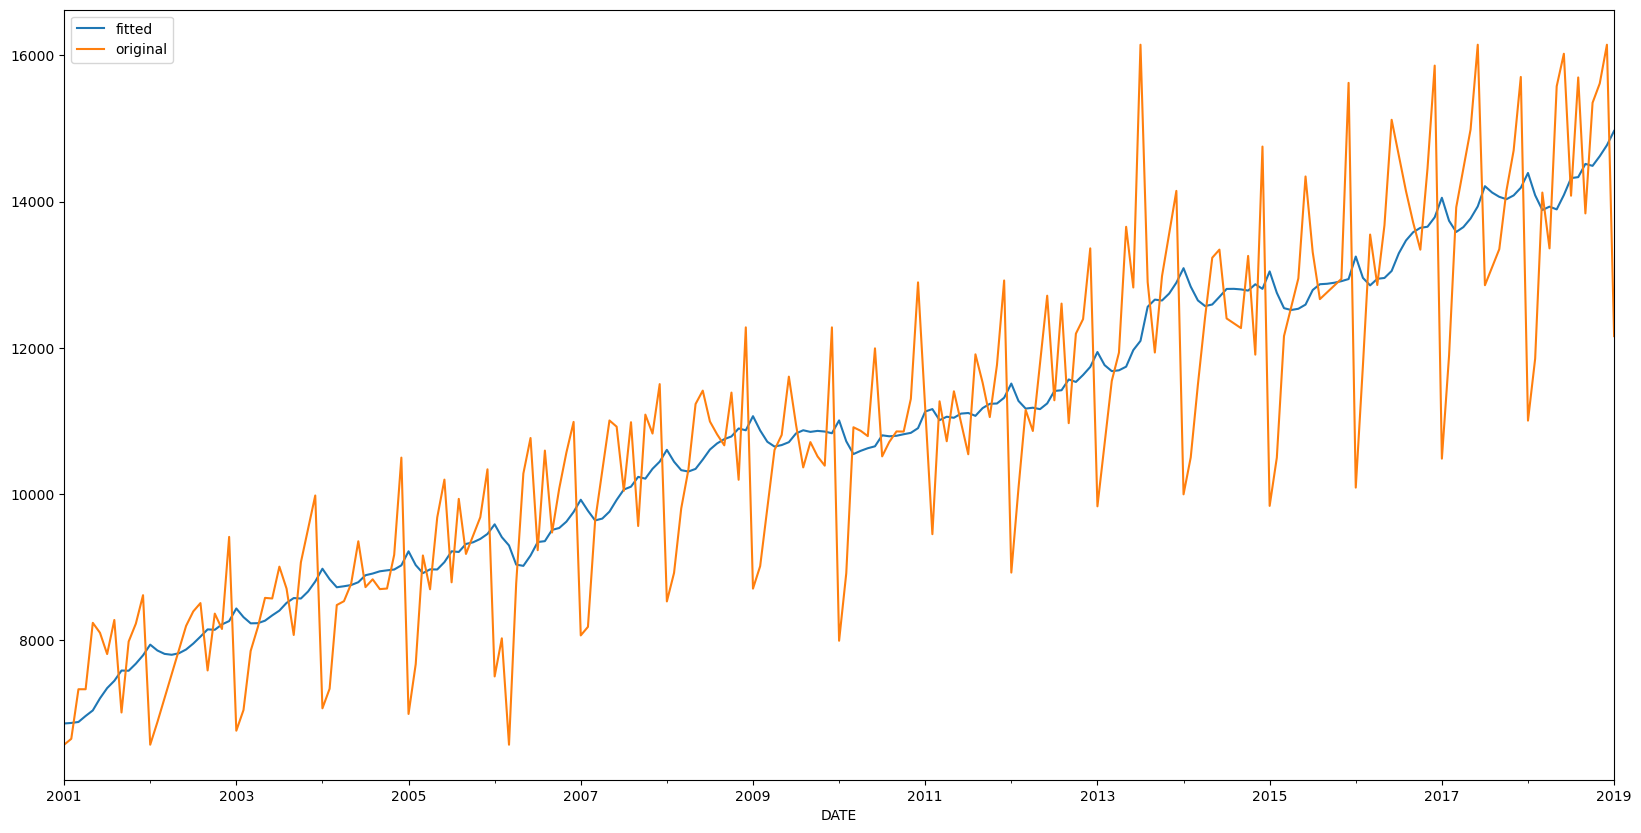

In [46]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add').fit()
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()

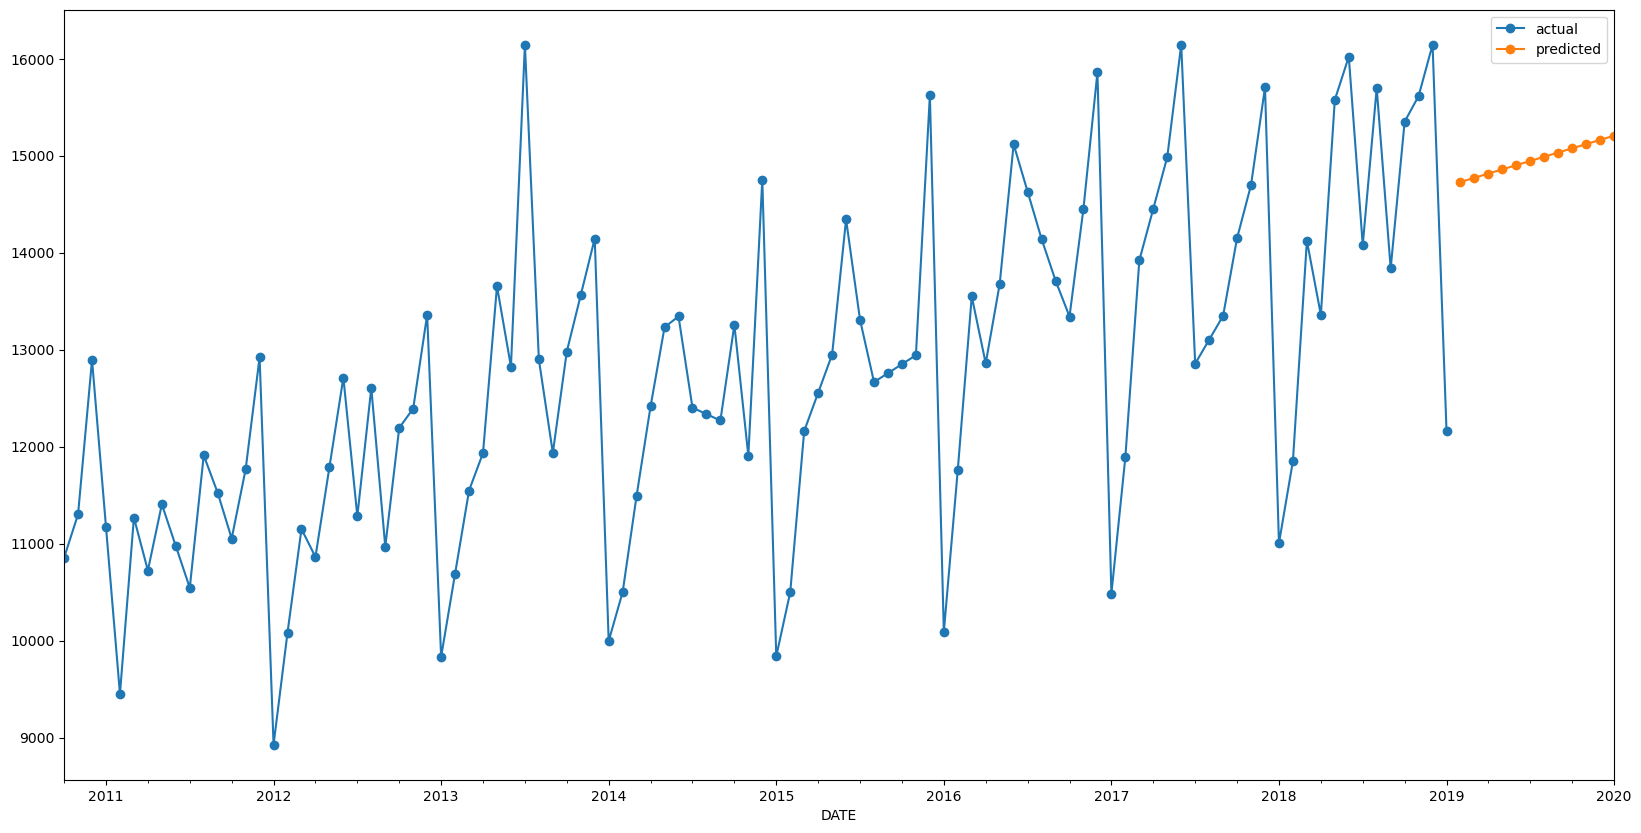

In [47]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


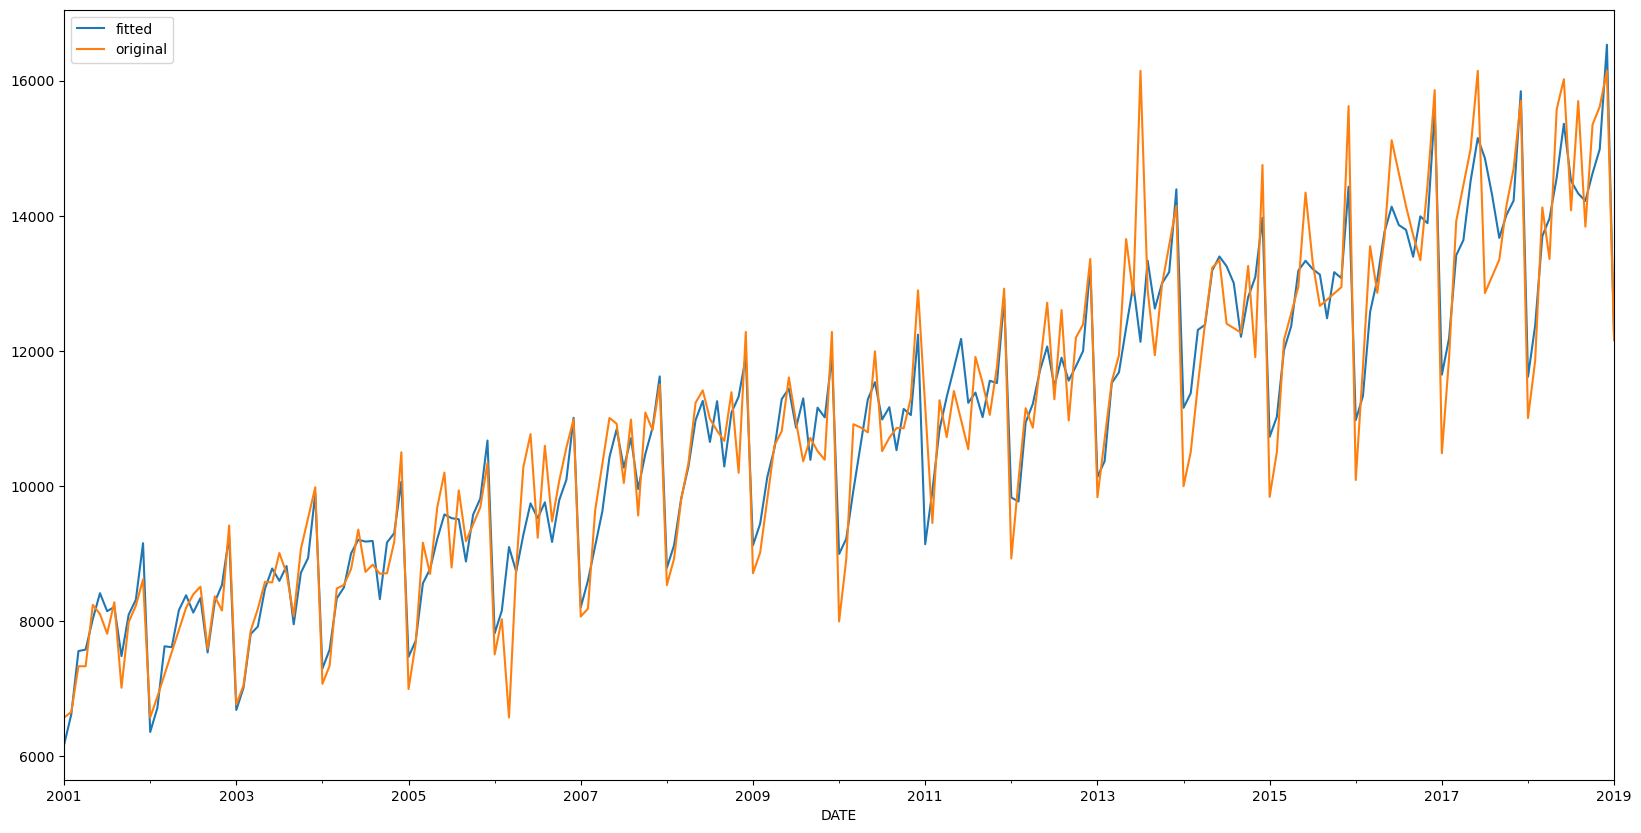

In [48]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add', seasonal='add').fit()
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()

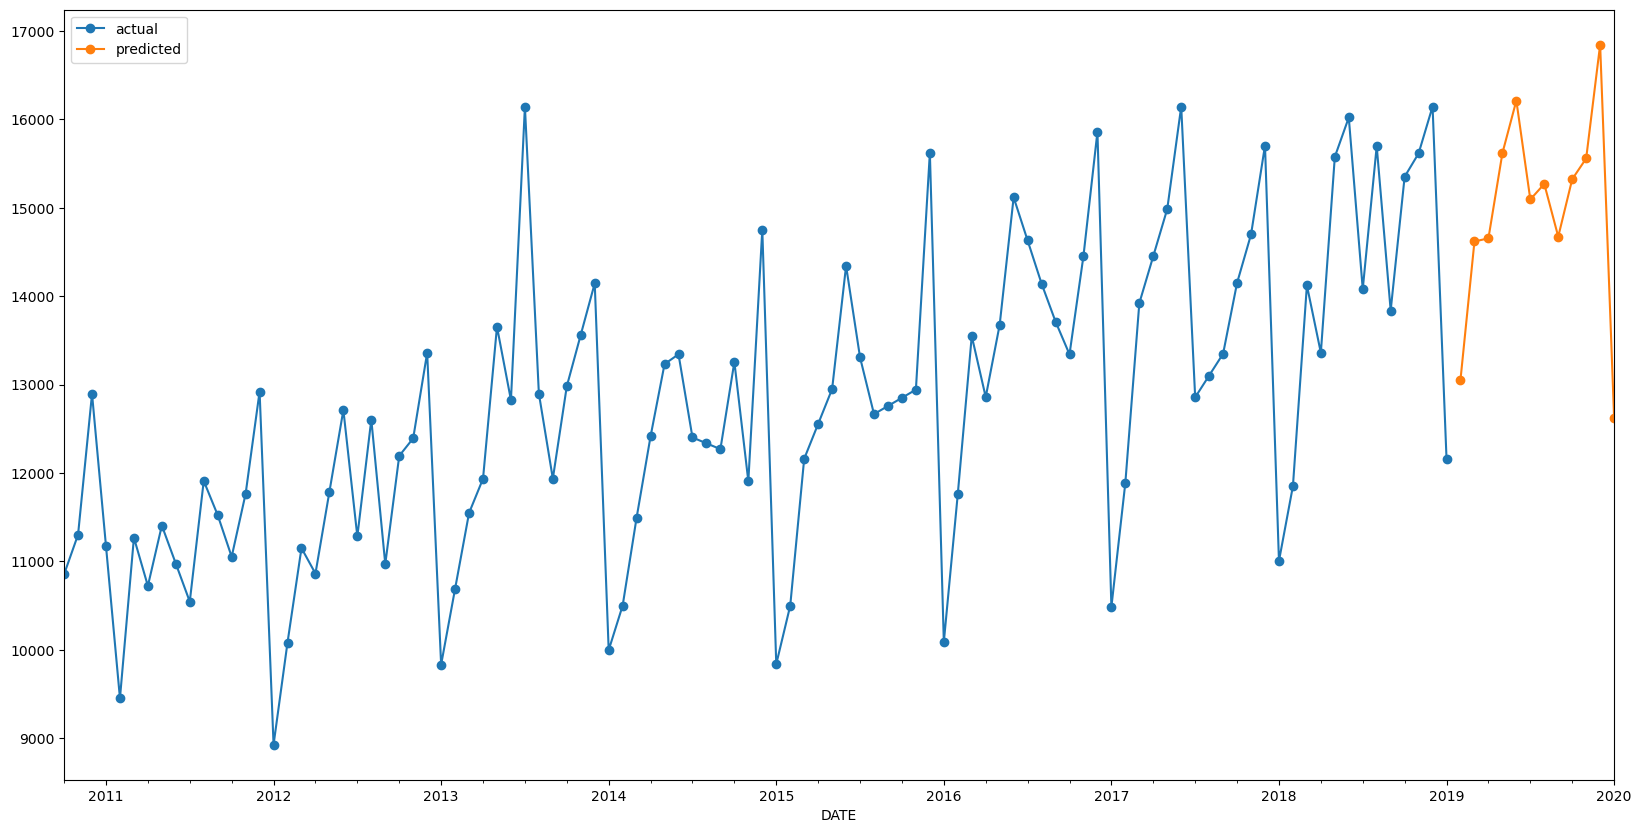

In [49]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


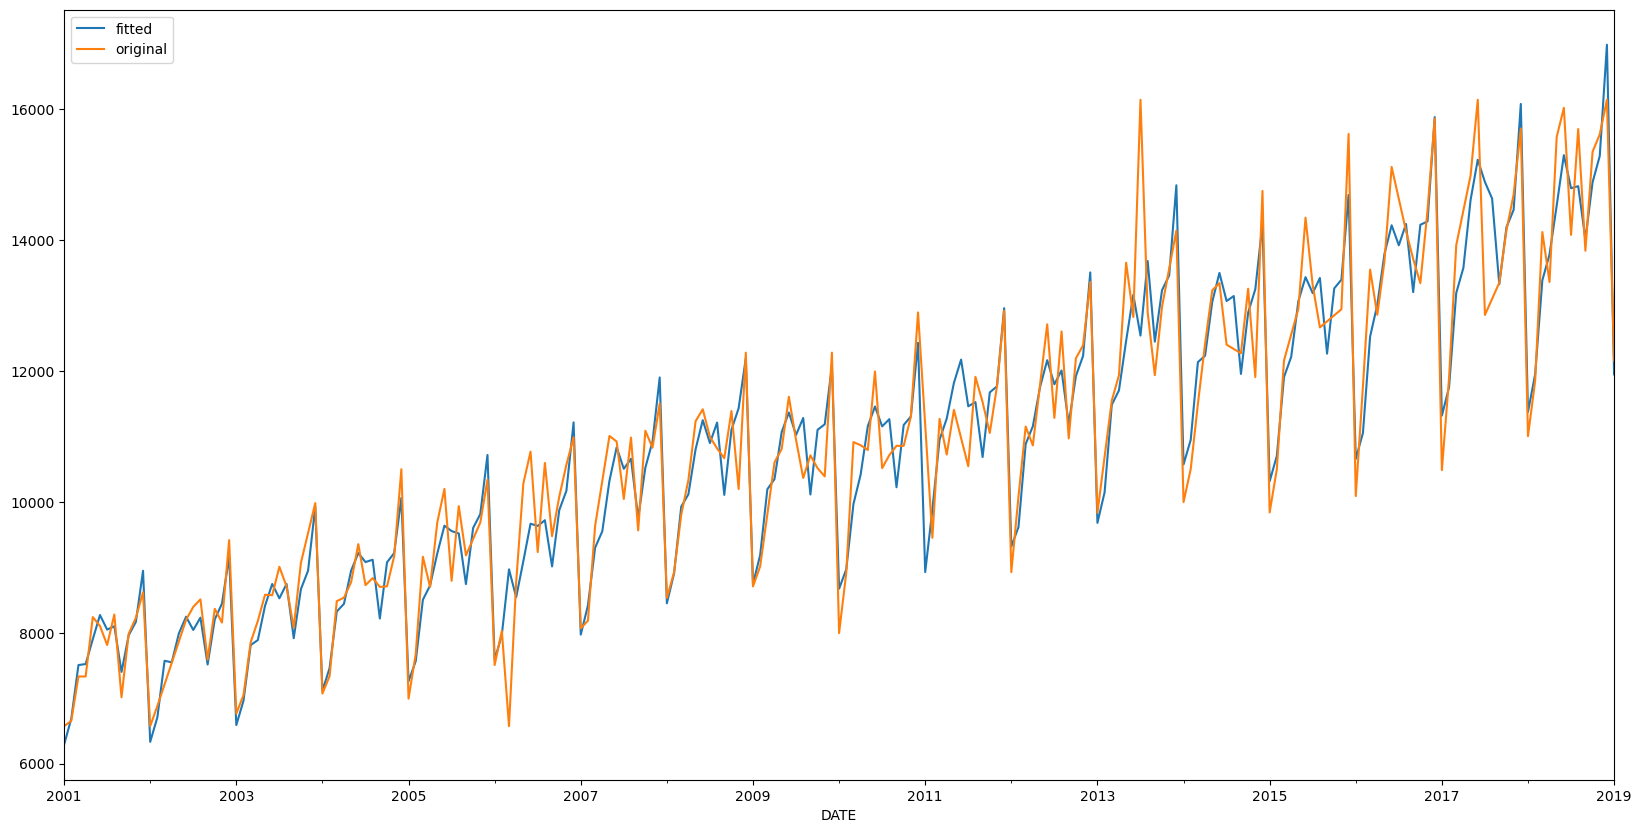

In [50]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='mul', seasonal='mul').fit(smoothing_level=0.2)
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()

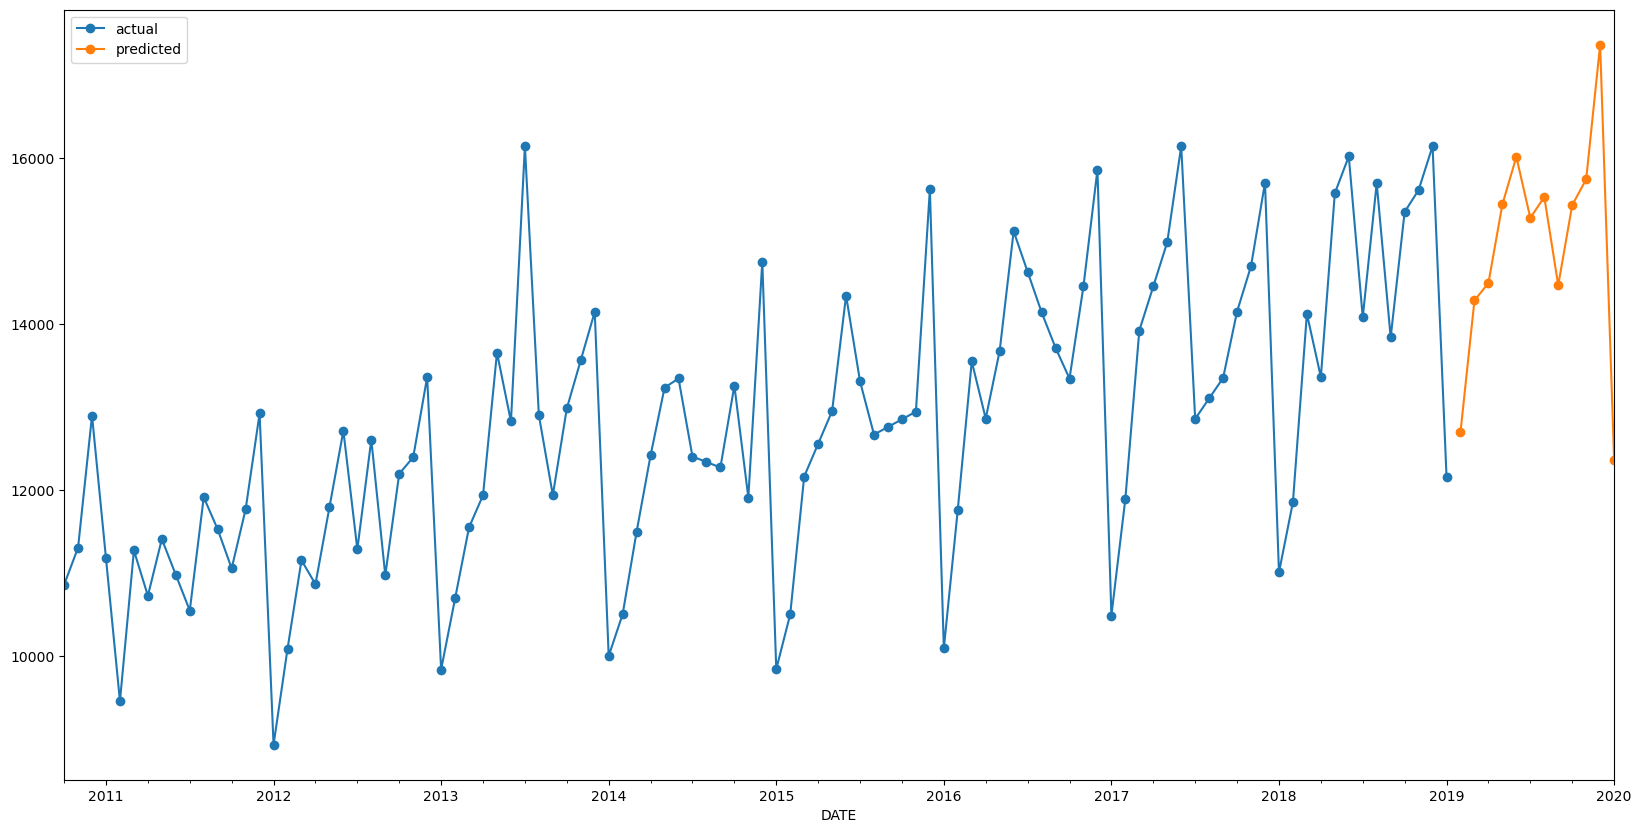

In [51]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

<Axes: xlabel='DATE'>

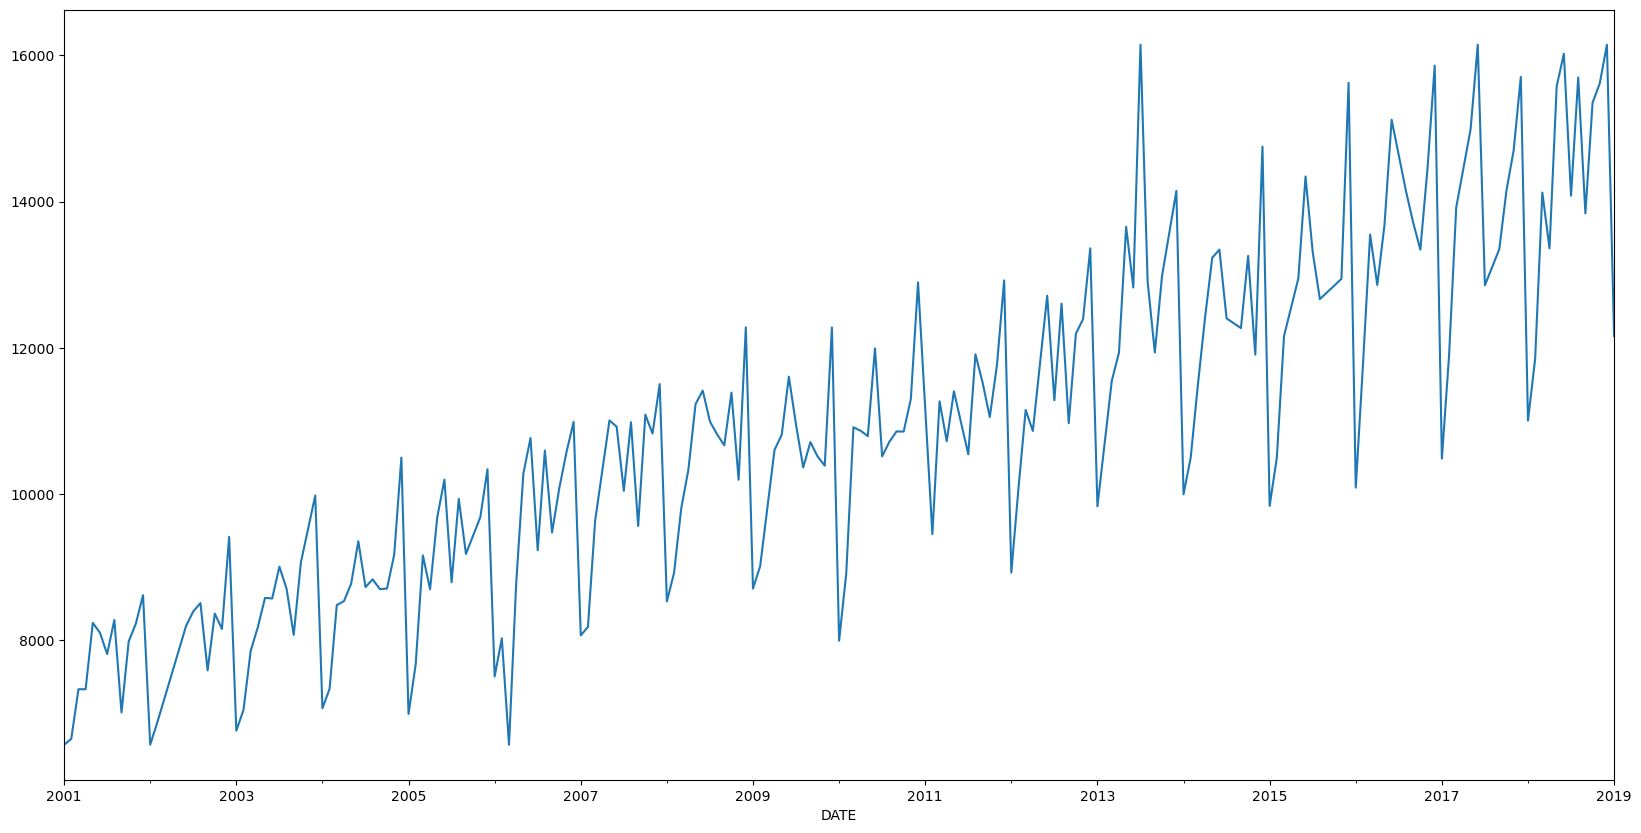

In [52]:
mobile_sales.Sales.plot()

In [53]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]

0.9786335779042278

In [54]:
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1] 
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

adf_test(mobile_sales.Sales)

Sequence is not stationary


In [55]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

<Axes: xlabel='DATE'>

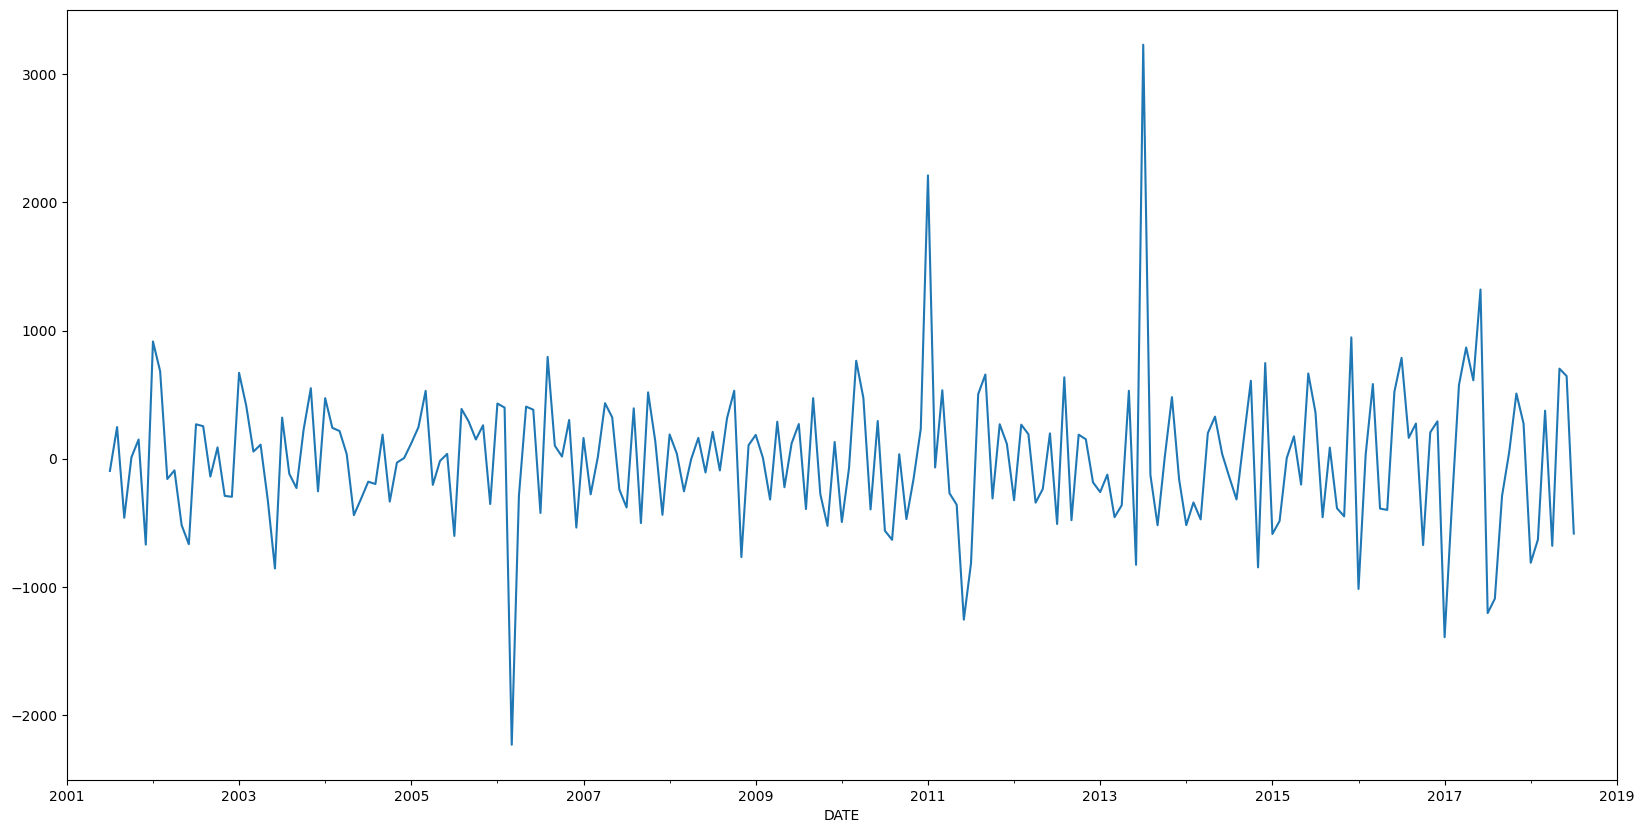

In [56]:
model.resid.plot()

In [57]:
adf_test(model.resid.dropna())

Sequence is stationary


In [58]:
sm.tsa.stattools.adfuller(model.resid.dropna())[1]

3.7134101382157896e-08

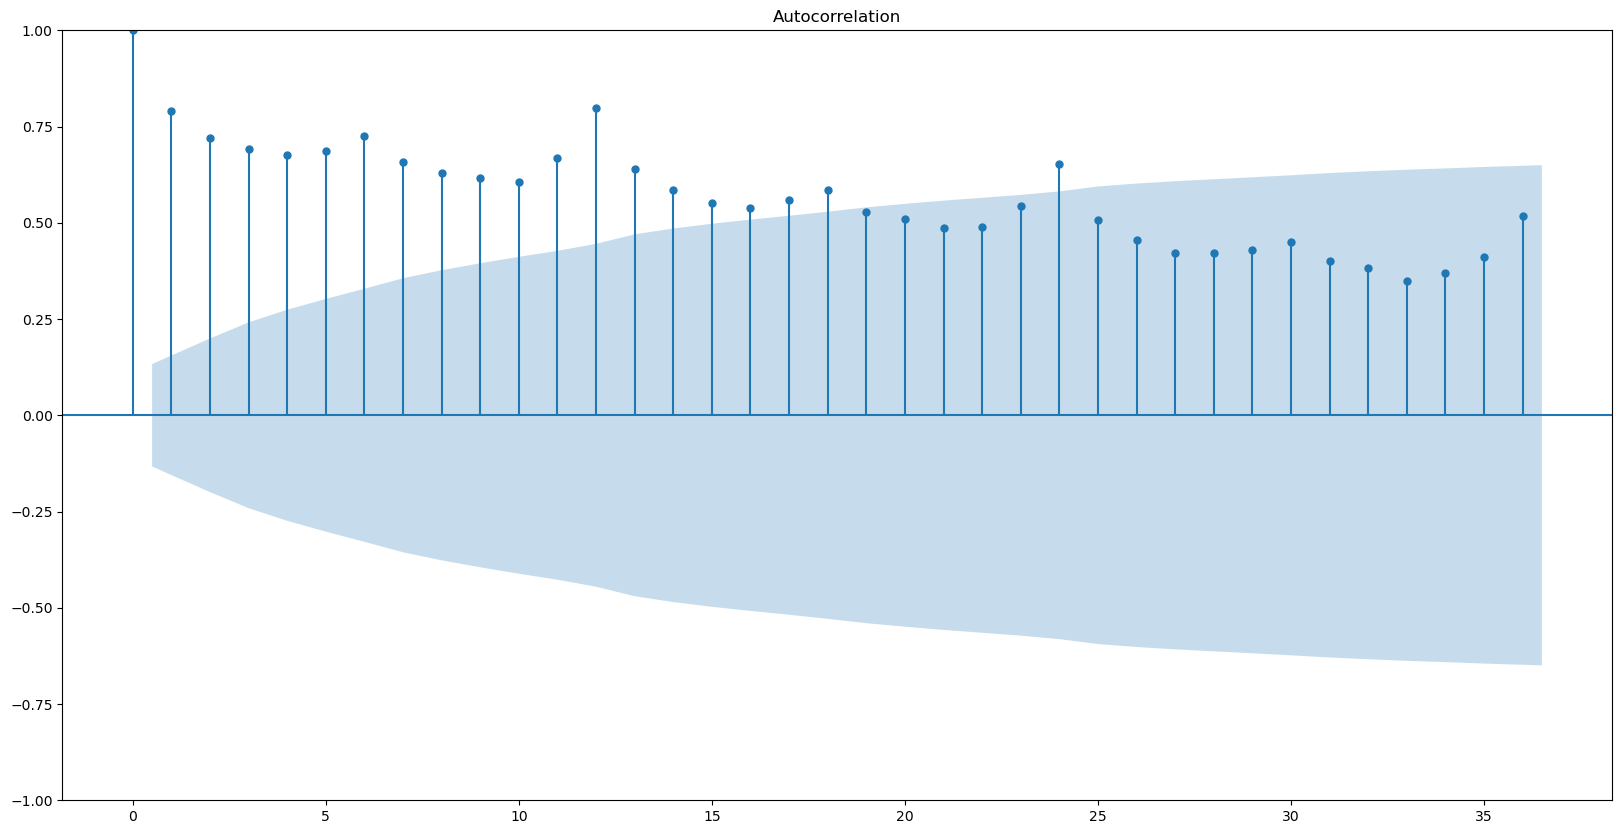

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(mobile_sales.Sales, lags=36);

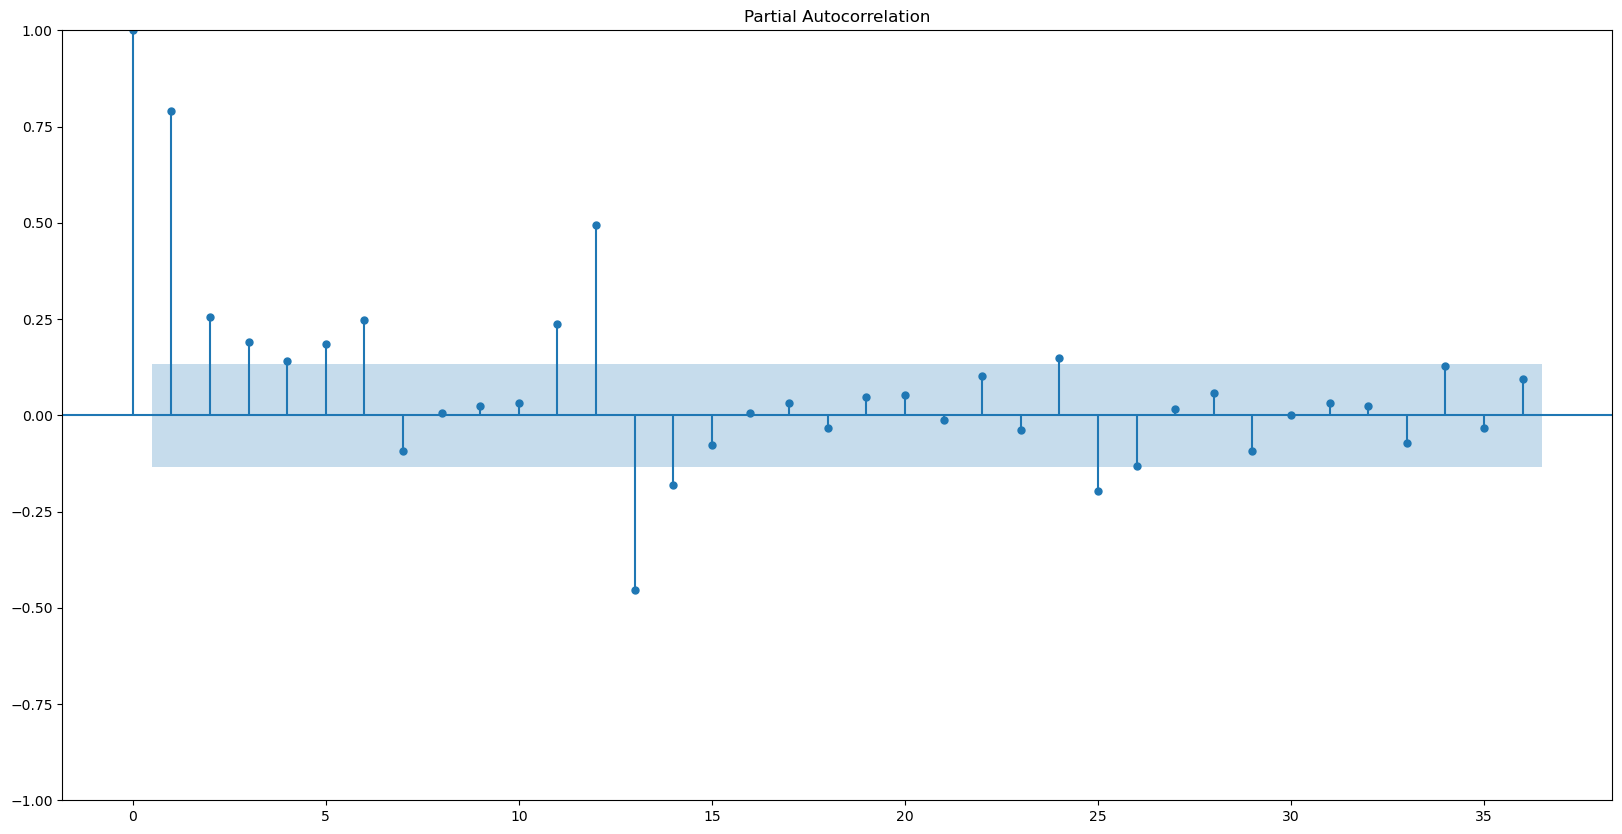

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_pacf(mobile_sales.Sales, lags=36);

In [61]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]

0.9786335779042278

<Axes: xlabel='DATE'>

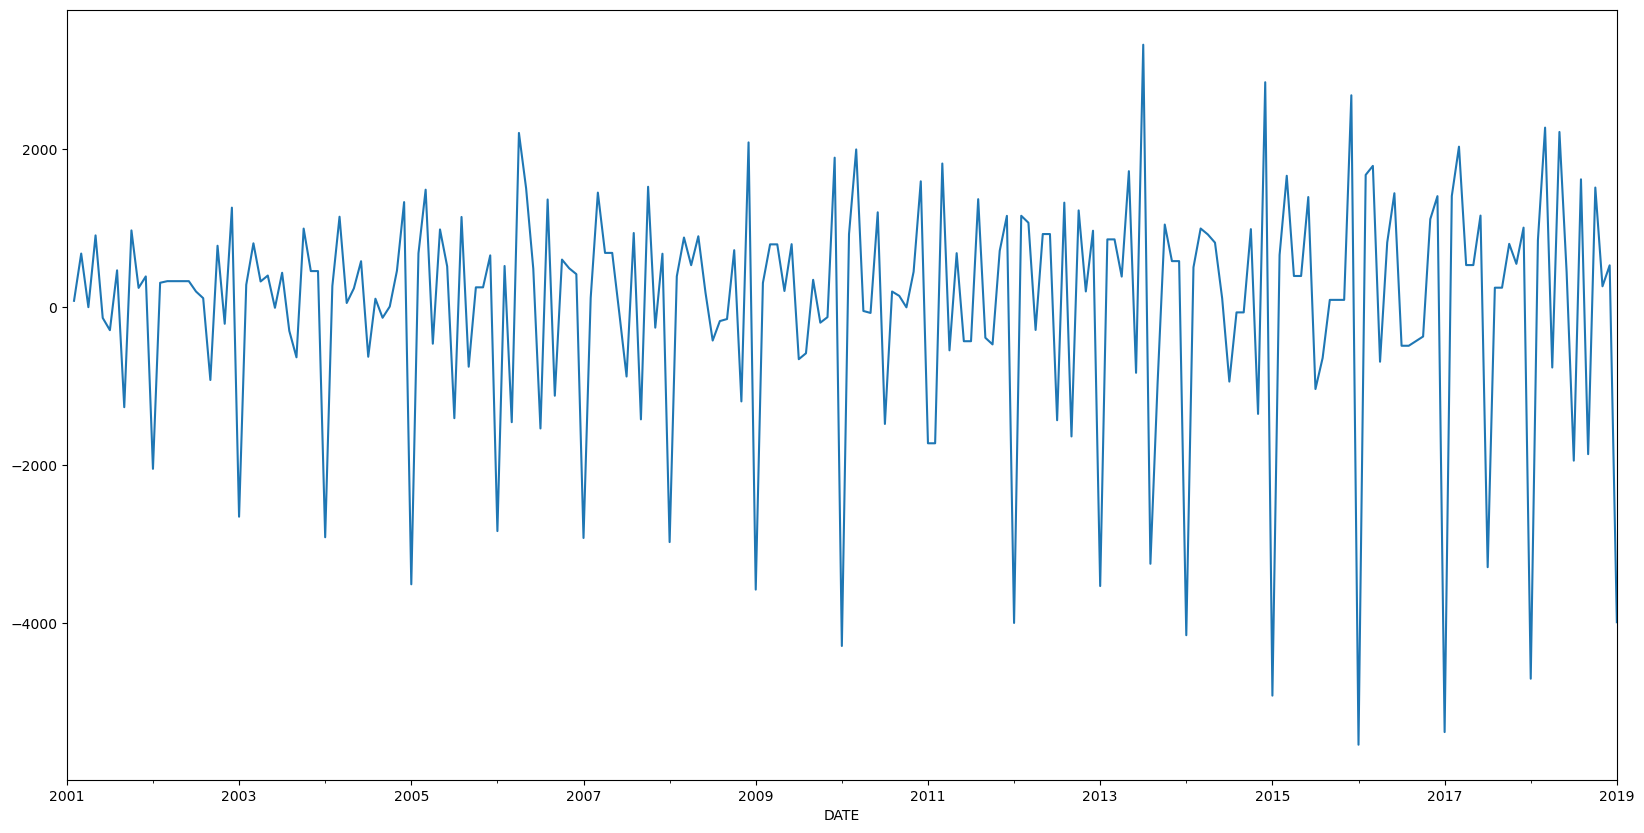

In [62]:
mobile_sales.Sales.diff(1).plot()

In [63]:
sm.tsa.stattools.adfuller(mobile_sales.Sales.diff(1).dropna())[1]

1.0038630872315659e-16

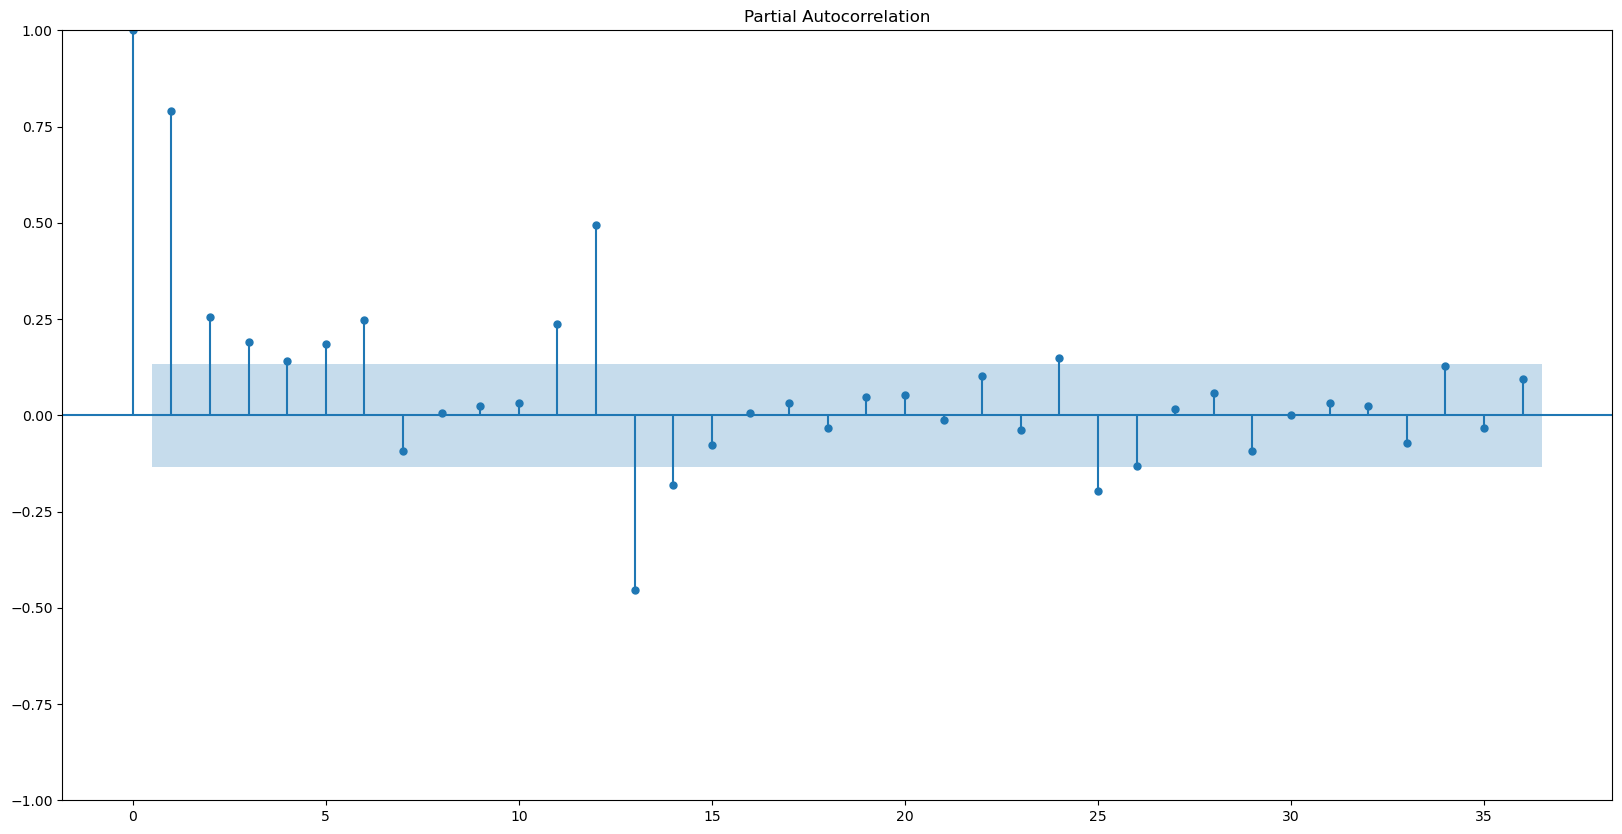

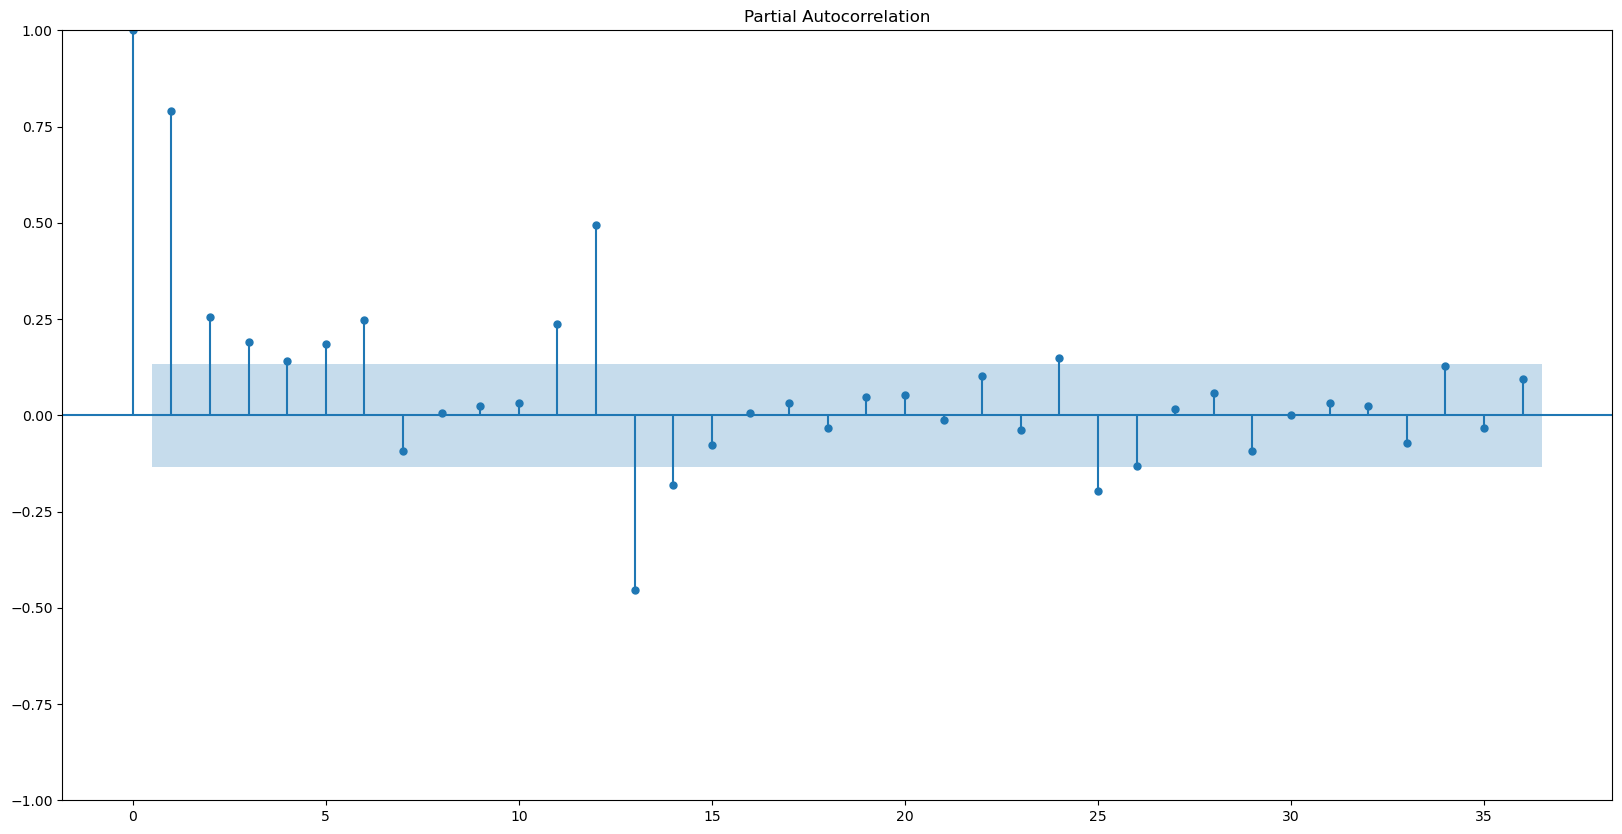

In [64]:
plot_pacf(mobile_sales.Sales, lags=36)

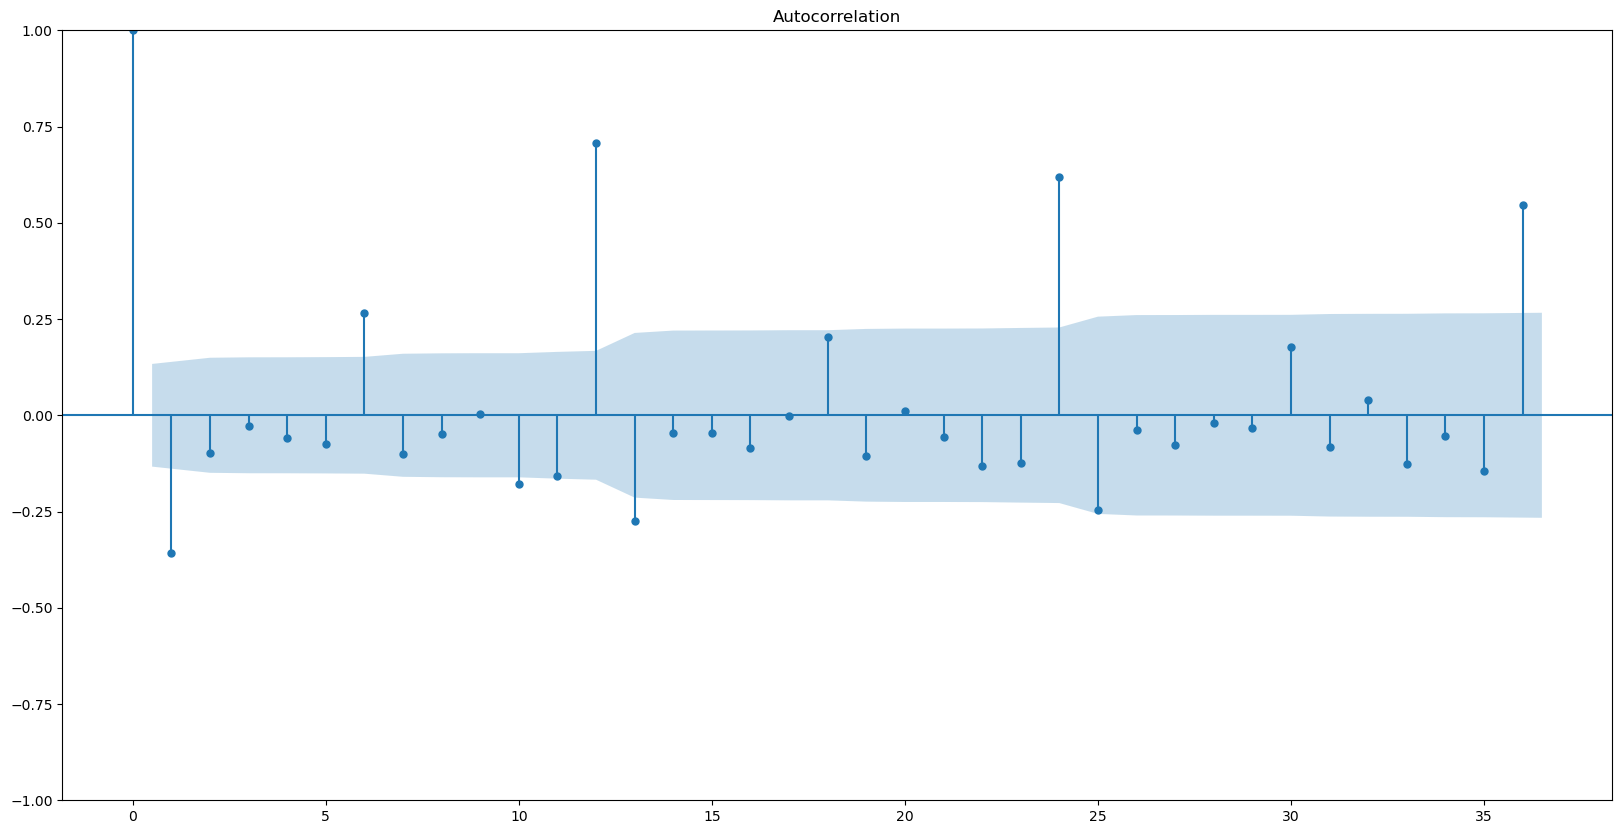

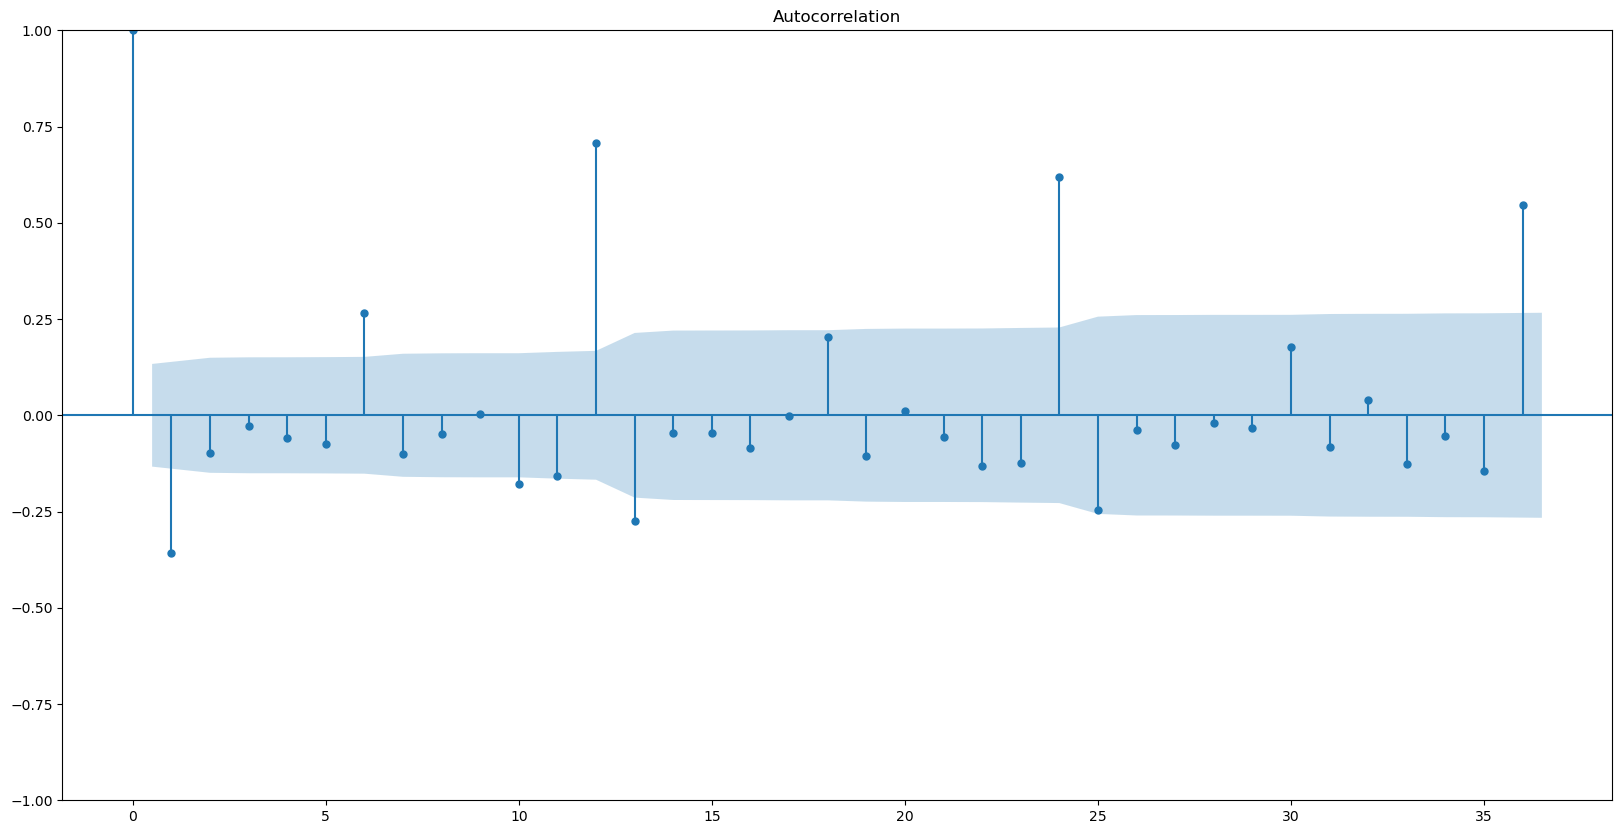

In [65]:
plot_acf(mobile_sales.Sales.diff(1).dropna(), lags=36)

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [67]:
train_x_st = train_x.copy()
train_x_st.Sales = train_x_st.Sales.diff(1)
train_x_st.dropna(inplace=True)
adf_test(train_x_st.Sales)

Sequence is stationary


C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE : 1457.414
RMSE : 1623.419
MAPE: 9.789


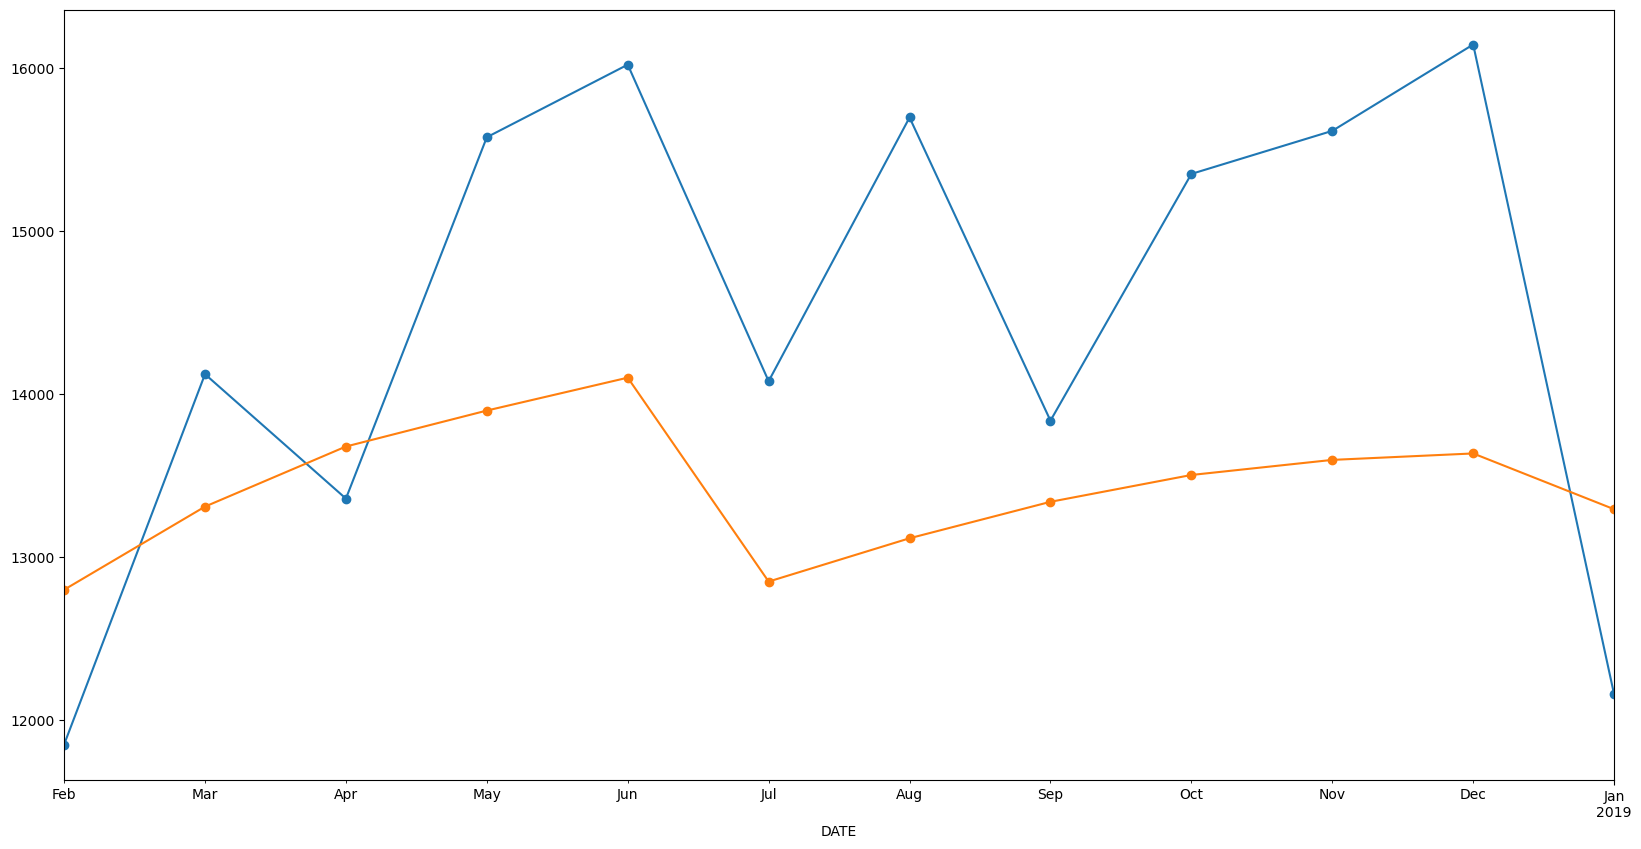

In [68]:
model = SARIMAX(train_x_st.Sales, order=(5, 0, 0)) 
model = model.fit(disp=False)
## Predictions
test_x['pred'] = model.forecast(steps=12) # We forecasted delta y 
# integrate it back to non-stationary level
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

test_x['Sales'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 1174.044
RMSE : 1336.728
MAPE: 7.907


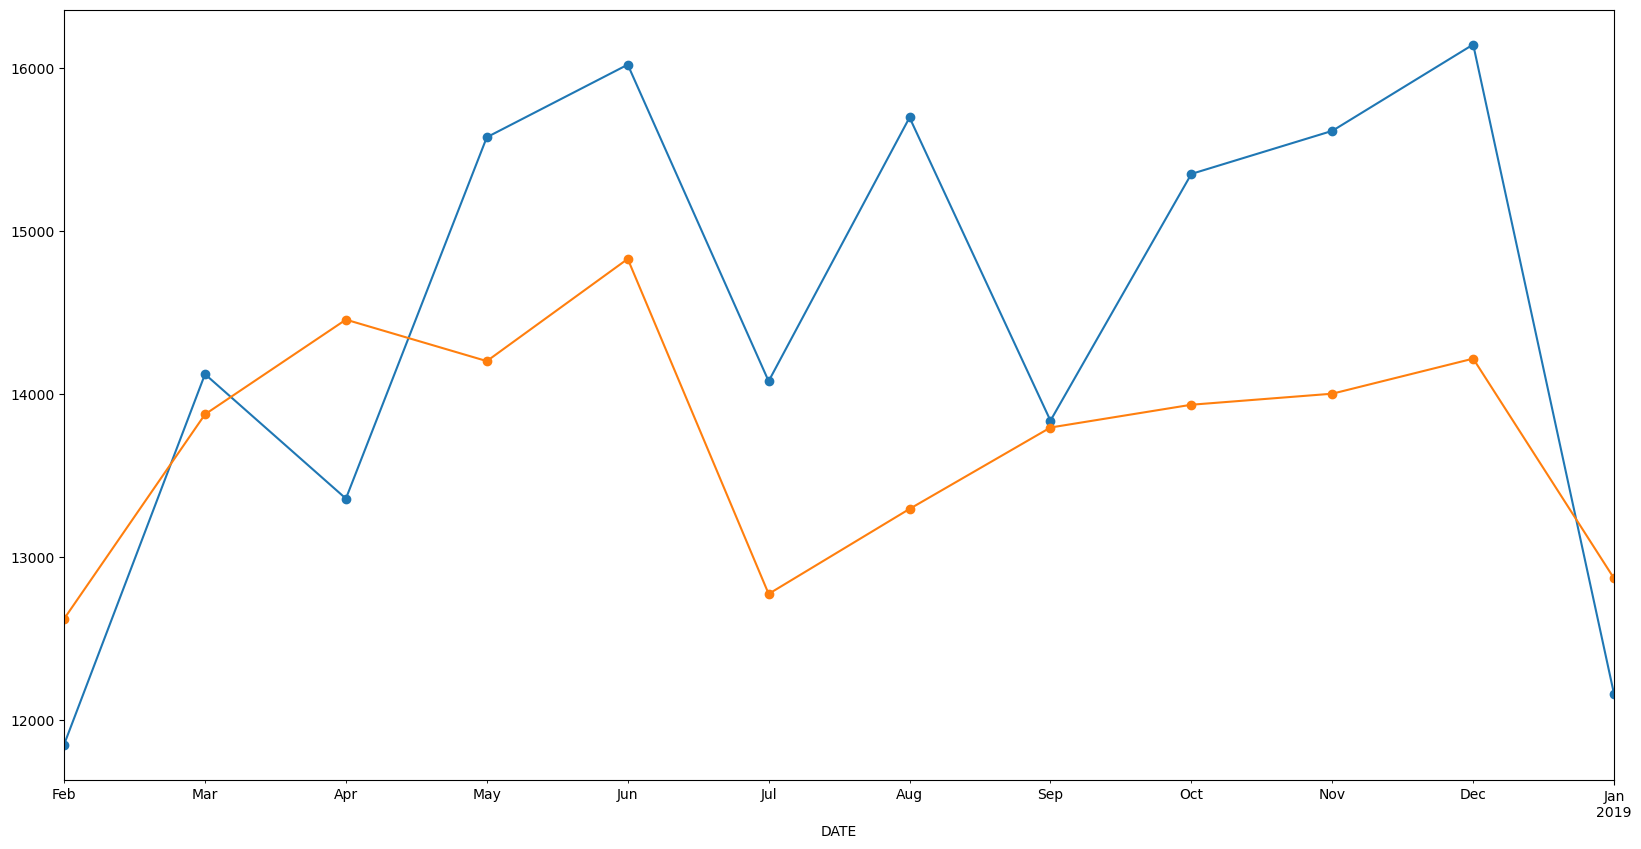

In [69]:
model = SARIMAX(train_x_st.Sales, order=(0, 0, 15)) 
model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)

# integrate it back to non-stationary level
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

test_x['Sales'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 862.77
RMSE : 1004.162
MAPE: 5.842


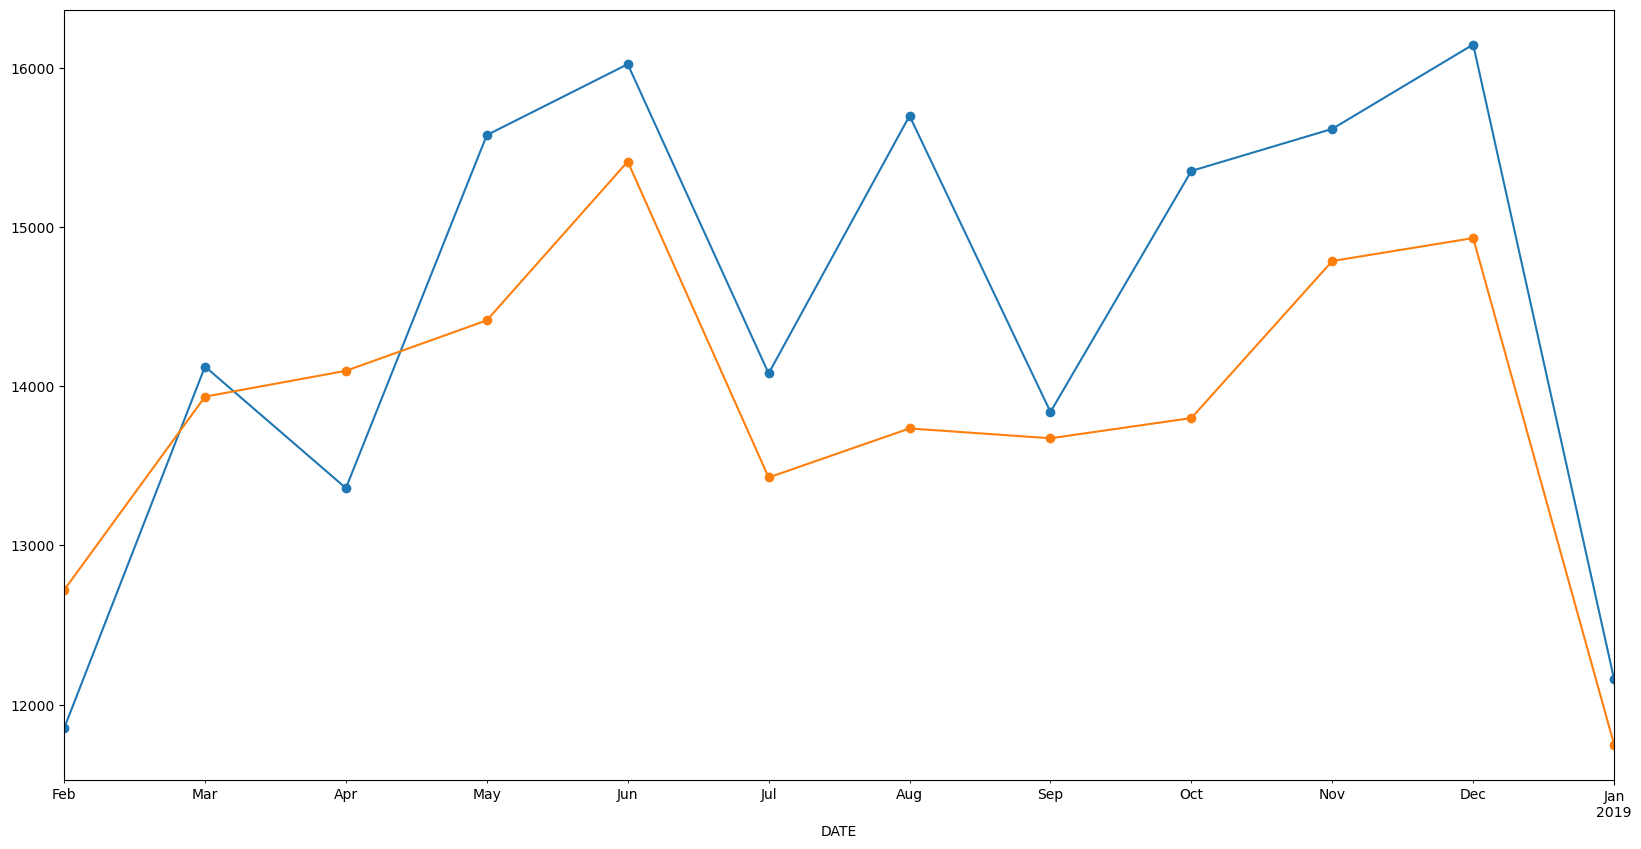

In [73]:
model = SARIMAX(train_x_st.Sales, order=(10, 0, 10))
model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12) # delta y 

# integrate it back to non-stationary level
test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

test_x['Sales'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  204
Model:             SARIMAX(10, 0, 10)   Log Likelihood               -1671.033
Date:                Sat, 09 Sep 2023   AIC                           3384.065
Time:                        02:35:00   BIC                           3453.746
Sample:                    02-01-2001   HQIC                          3412.252
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3770      0.438      0.861      0.389      -0.482       1.236
ar.L2         -1.0056      0.351     -2.862      0.004      -1.694      -0.317
ar.L3          0.0185      0.551      0.034      0.973      -1.062       1.099
ar.L4         -0.3859      0.236     -1.637      0.102      -0.848       0.076
ar.L5         -0.7048      0.254     -2.772      0.006      -1.203      -0.206
ar.L6          0.3003      0.217      1.386      0.166      -0.124       0.725
ar.L7         -1.0692      0.232     -4.617      0.000      -1.523      -0.615
ar.L8          0.2982      0.498      0.599      0.549      -0.678       1.275
ar.L9         -0.7119      0.303     -2.351      0.019      -1.306      -0.118
ar.L10        -0.3044      0.351     -0.868      0.385      -0.992       0.383
ma.L1         -1.3027      0.528     -2.466      0.014      -2.338      -0.267
ma.L2          1.5136      0.875      1.729      0.084      -0.202       3.229
ma.L3         -1.0382      1.183     -0.878      0.380      -3.356       1.280
ma.L4          0.6091      1.216      0.501      0.617      -1.775       2.993
ma.L5          0.2662      1.219      0.218      0.827      -2.124       2.656
ma.L6         -0.9030      1.010     -0.894      0.372      -2.883       1.078
ma.L7          1.4048      0.838      1.677      0.094      -0.237       3.047
ma.L8         -1.2546      0.762     -1.647      0.100      -2.748       0.239
ma.L9          1.0784      0.595      1.813      0.070      -0.088       2.244
ma.L10        -0.4027      0.399     -1.009      0.313      -1.185       0.380
sigma2      1.313e+06   1.59e-05   8.25e+10      0.000    1.31e+06    1.31e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):               221.29
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               2.31   Skew:                             0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.12e+26. Standard errors may be unstable.
"""

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum L

MAE : 820.726
RMSE : 928.595
MAPE: 5.595


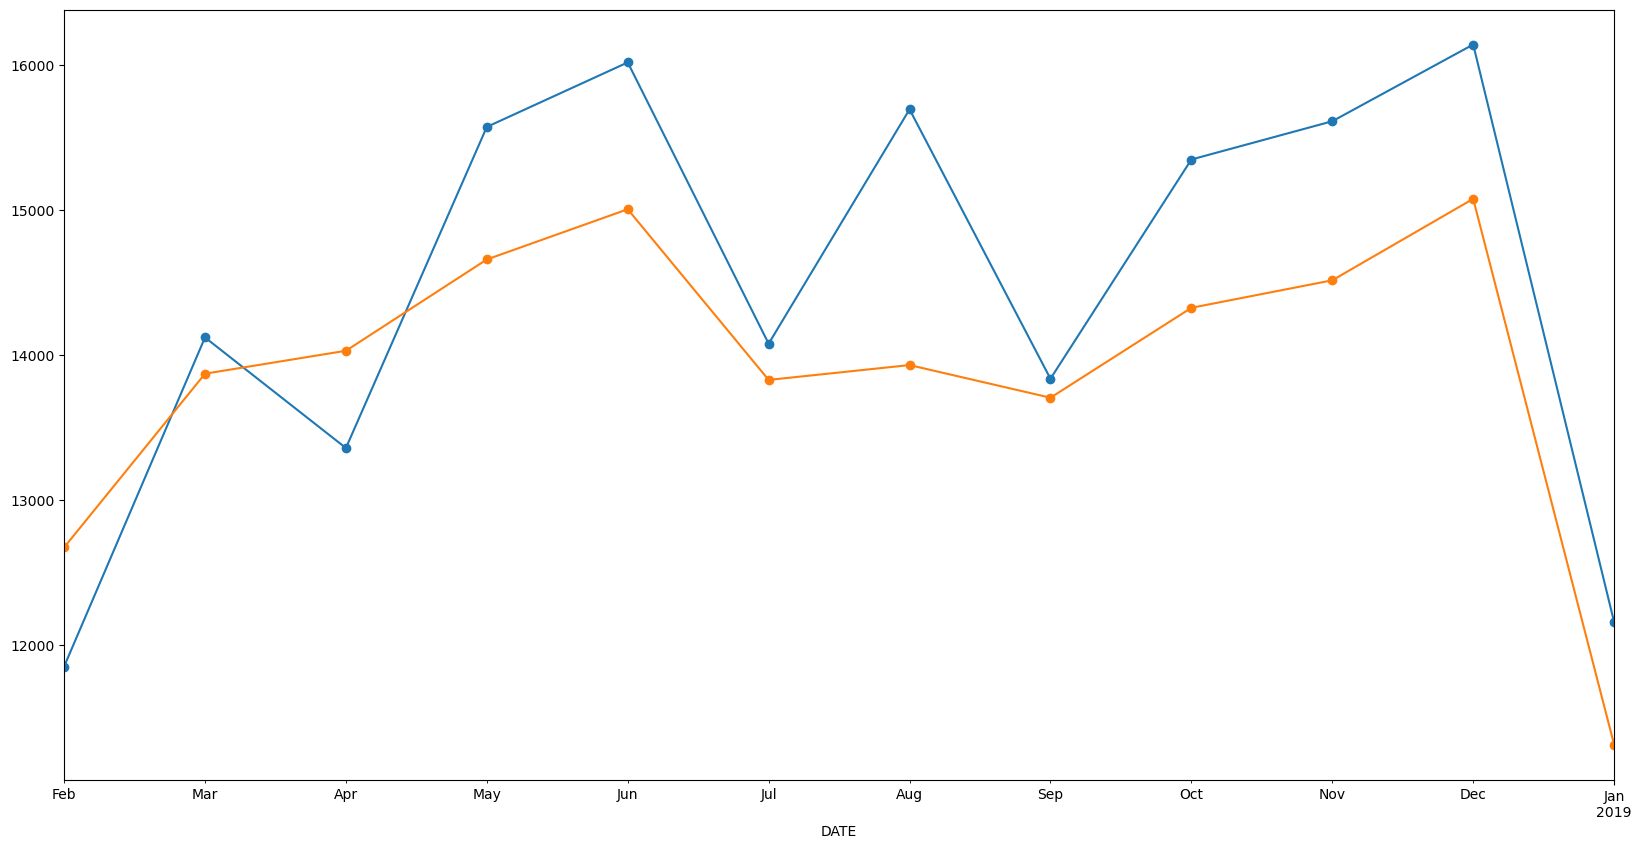

In [81]:
model = SARIMAX(train_x.Sales, order=(12, 1, 12)) 
model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)

test_x['Sales'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  205
Model:             SARIMAX(12, 1, 12)   Log Likelihood               -1639.444
Date:                Sat, 09 Sep 2023   AIC                           3328.888
Time:                        02:38:26   BIC                           3411.841
Sample:                    01-01-2001   HQIC                          3362.444
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5732      0.364     -1.575      0.115      -1.287       0.140
ar.L2         -0.5434      0.336     -1.615      0.106      -1.203       0.116
ar.L3         -0.6215      0.289     -2.148      0.032      -1.188      -0.054
ar.L4         -0.5852      0.351     -1.668      0.095      -1.273       0.102
ar.L5         -0.5567      0.330     -1.686      0.092      -1.204       0.090
ar.L6         -0.6133      0.310     -1.981      0.048      -1.220      -0.006
ar.L7         -0.5806      0.341     -1.703      0.089      -1.249       0.088
ar.L8         -0.5522      0.329     -1.680      0.093      -1.196       0.092
ar.L9         -0.6223      0.302     -2.063      0.039      -1.213      -0.031
ar.L10        -0.5759      0.359     -1.605      0.109      -1.279       0.127
ar.L11        -0.5137      0.327     -1.570      0.116      -1.155       0.128
ar.L12         0.3364      0.278      1.212      0.226      -0.208       0.881
ma.L1         -0.2253      0.371     -0.607      0.544      -0.952       0.502
ma.L2          0.0420      0.139      0.302      0.763      -0.231       0.315
ma.L3          0.2986      0.126      2.363      0.018       0.051       0.546
ma.L4          0.1191      0.263      0.453      0.650      -0.396       0.634
ma.L5          0.0199      0.152      0.131      0.896      -0.278       0.318
ma.L6          0.3168      0.146      2.175      0.030       0.031       0.602
ma.L7         -0.0107      0.198     -0.054      0.957      -0.400       0.378
ma.L8          0.0680      0.178      0.382      0.702      -0.281       0.417
ma.L9          0.3637      0.151      2.405      0.016       0.067       0.660
ma.L10        -0.0171      0.269     -0.064      0.949      -0.544       0.510
ma.L11         0.0831      0.181      0.459      0.646      -0.272       0.438
ma.L12        -0.3903      0.150     -2.598      0.009      -0.685      -0.096
sigma2      5.385e+05   7.99e+04      6.741      0.000    3.82e+05    6.95e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):               144.56
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             0.53
Prob(H) (two-sided):                  0.31   Kurtosis:                         6.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.34e+14. Standard errors may be unstable.
"""

# ML: Time Series Analysis - 4

Don't just look at MAPE, also keep in mind the AIC or BIC value. If the model improves, AIC decreases.

### How to choose the correct value for p and q?

From the above resuts:<br>
AIC for order=(10, 0, 10) -> 3384.065<br>
AIC for order=(12, 1, 12) -> 3328.888<br>         
It's a slight change in AIC. We can stick to 10 which would make a simpler model. It depends on the business requirement as well.
- Hack: For monthly data, take (p = 12, q = 12), for quarterly data, take (p = 4, q = 4). If including 12,12 is doing a better job(lesser AIC value as we can see above), that means there's a strong indication that we have seasonality in the data. So, we should be thinking about building S(seasonal)ARIMA model. 
- Ofcourse ACF and PACF does the job too. 

### SARIMA

- The moment we bring in seasonality, seasonal components are going to be there. 
- We don't need to go all the way upto 12 lags in "order" to kind of make a better forecast. That's the whole purpose of including seasonal components.
1. Let's use P = 1 as it indicates we're taking the lag of 12(last year). This is better indicator than 2 years back.
2. There's strong seasonality in this data. We did TES on it and it gave good result cuz it has good trend and seasonality. 
3. So, doing seasonal differencing. D = 1
4.  Q = 1, one error term of seasonal.
5.  then S = 12, since that's the seasonal period.

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 531.39
RMSE : 620.177
MAPE: 3.715


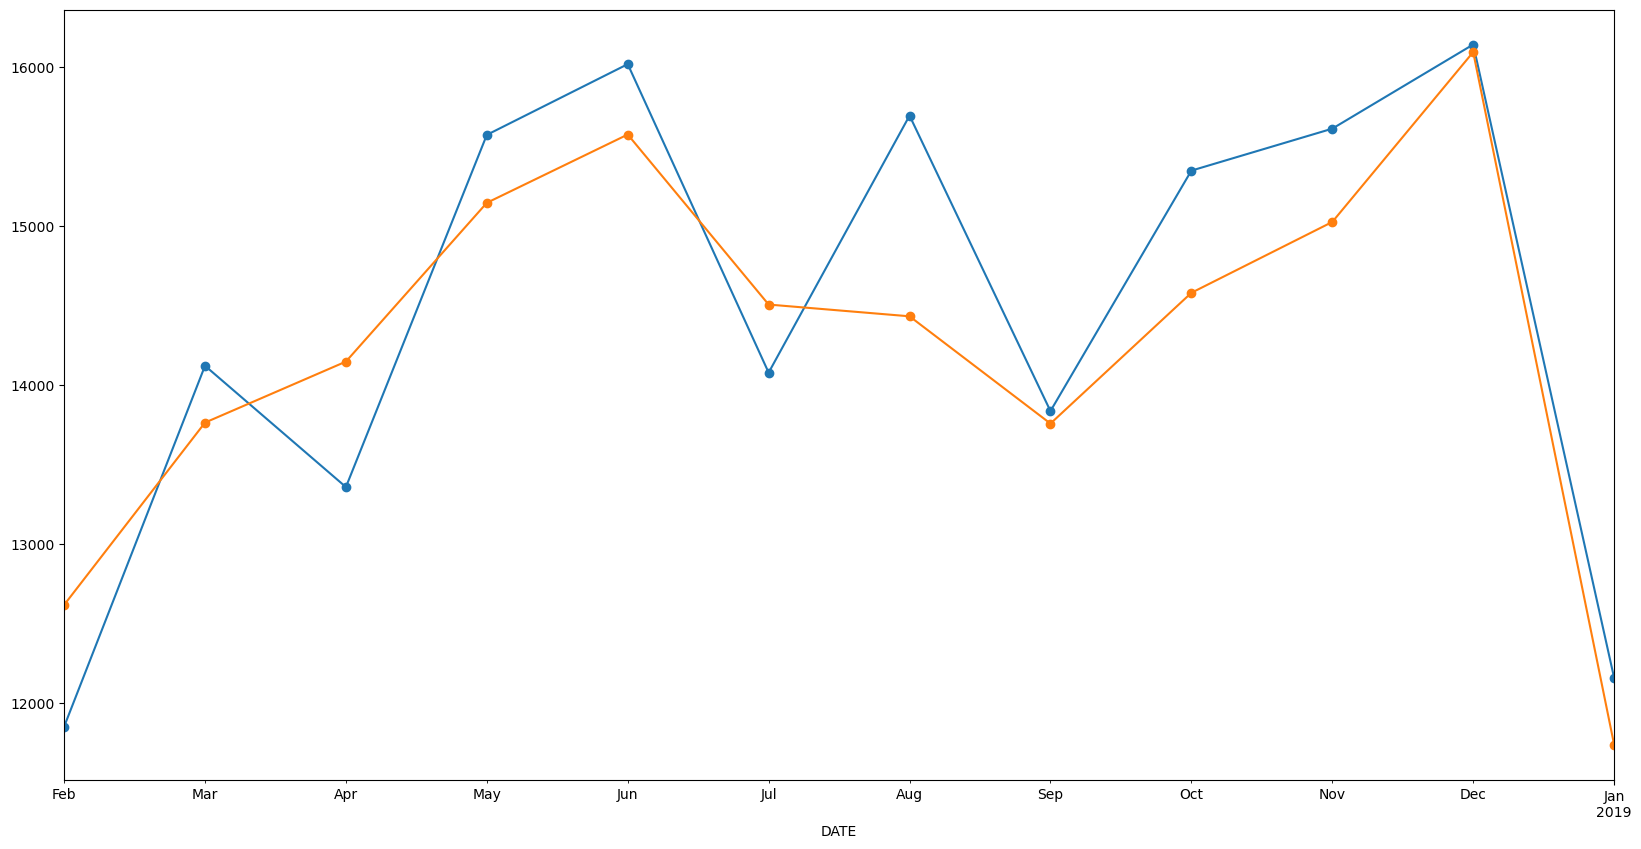

In [83]:
model = SARIMAX(train_x.Sales, order=(3, 1, 3), seasonal_order=(1,1,1,12)) # SARIMA model
model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)

test_x['Sales'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

- Just including one seasonal lag gave us MAPE 3.715. 
- Our best model with TES was pretty close, 3.6

In [129]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Sales   No. Observations:                  205
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood               -1534.078
Date:                              Mon, 04 Sep 2023   AIC                           3086.156
Time:                                      21:51:15   BIC                           3115.473
Sample:                                  01-01-2001   HQIC                          3098.030
                                       - 01-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9123      0.121     -7.522      0.000      -1.150      -0.675
ar.L2         -0.7337      0.144     -5.084      0.000      -1.017      -0.451
ar.L3          0.2280      0.118      1.925      0.054      -0.004       0.460
ma.L1          0.1623      0.120      1.356      0.175      -0.072       0.397
ma.L2         -0.0813      0.090     -0.899      0.369      -0.259       0.096
ma.L3         -0.9300      0.133     -6.981      0.000      -1.191      -0.669
ar.S.L12      -0.0336      0.194     -0.174      0.862      -0.413       0.346
ma.S.L12      -0.6243      0.210     -2.977      0.003      -1.035      -0.213
sigma2      6.914e+05   1.03e+05      6.687      0.000    4.89e+05    8.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               545.69
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                             0.99
Prob(H) (two-sided):                  0.10   Kurtosis:                        11.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- The best we got without seasonal component was `AIC = 3328.888` with `order=(12, 1, 12)`, 12 lags and 12 error terms into the past.
- Now, we're getting `AIC = 3086.156` with `order=(3, 1, 3)` ie. 3 lags and 3 error terms and `seasonal_order=(1,1,1,12)`, 1 seasonal lag, 1 seasonal error term and 1 seasonal difference.

##### What if we don't take the seasonal difference?

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 634.649
RMSE : 742.931
MAPE: 4.309


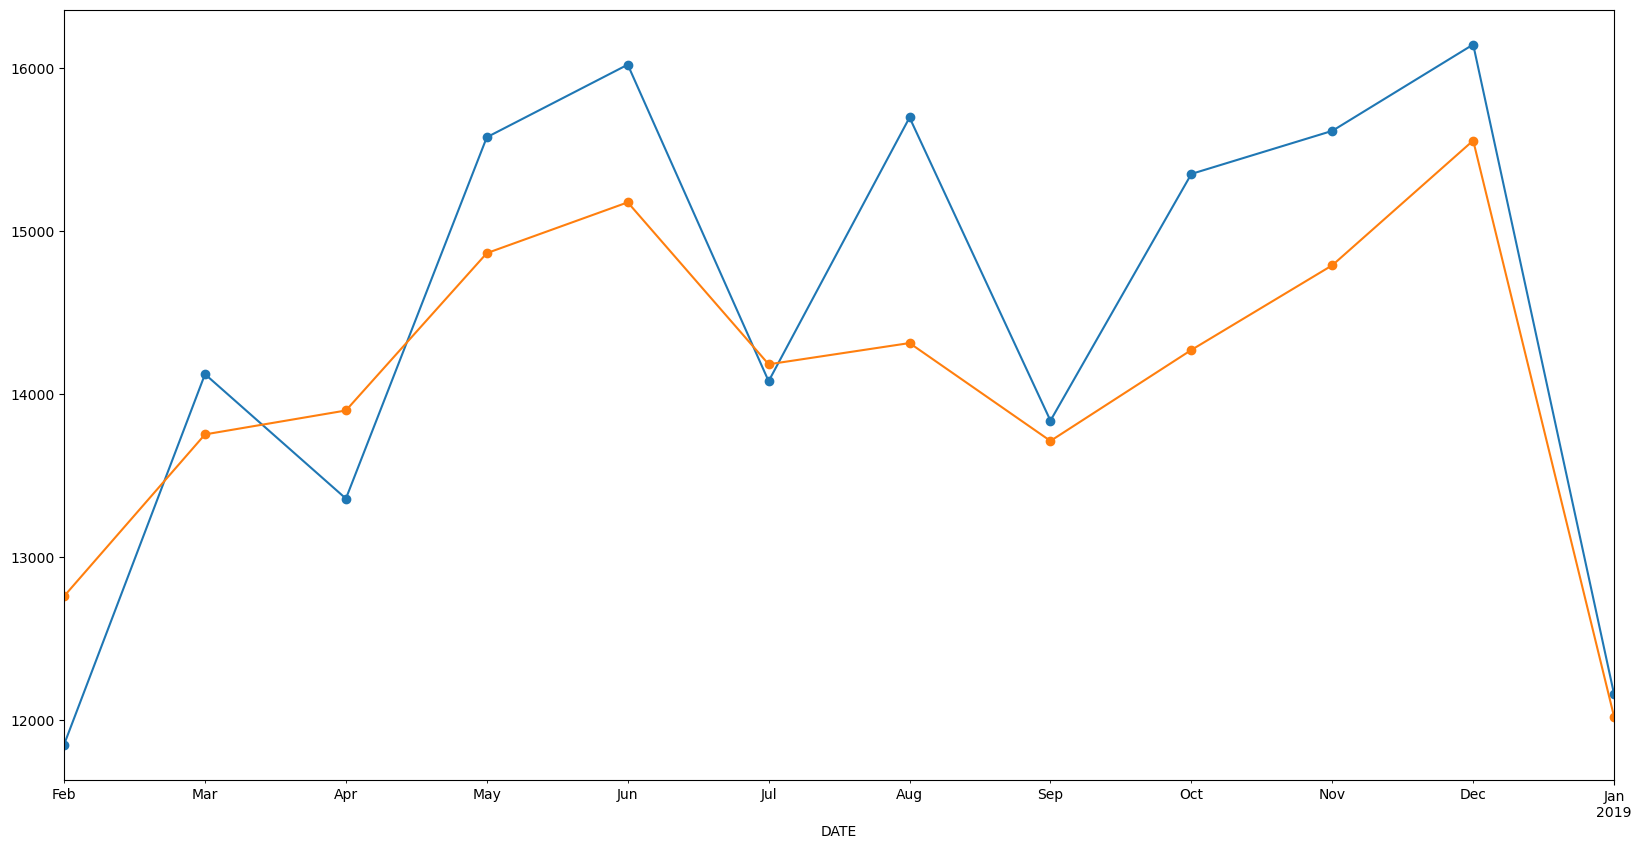

In [84]:
model = SARIMAX(train_x.Sales, order=(3, 1, 3), seasonal_order=(1,0,1,12)) # SARIMA model
model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=12)

test_x['Sales'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Sales   No. Observations:                  205
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -1685.505
Date:                              Sat, 09 Sep 2023   AIC                           3389.010
Time:                                      22:14:57   BIC                           3418.873
Sample:                                  01-01-2001   HQIC                          3401.090
                                       - 01-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0111      0.263     -3.840      0.000      -1.527      -0.495
ar.L2         -0.8426      0.283     -2.979      0.003      -1.397      -0.288
ar.L3          0.1293      0.224      0.577      0.564      -0.310       0.569
ma.L1          0.2863      0.239      1.198      0.231      -0.182       0.755
ma.L2          0.0066      0.163      0.041      0.968      -0.313       0.326
ma.L3         -0.8237      0.179     -4.600      0.000      -1.175      -0.473
ar.S.L12       0.9351      0.094      9.943      0.000       0.751       1.119
ma.S.L12      -0.6670      0.234     -2.847      0.004      -1.126      -0.208
sigma2      1.544e+06   2.54e+05      6.081      0.000    1.05e+06    2.04e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               137.12
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.57
Prob(H) (two-sided):                  0.94   Kurtosis:                         6.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.86e+14. Standard errors may be unstable.
"""

- Since, there's seasonality, seasonal differencing should bring much more explanation to the model. Hence, `AIC = 3389.010` got decreased.

### SARIMAX

This dataset does not have exogenous variables. So, we're gonna use another one.

In [86]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,8)

import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [88]:
Data link : https://drive.google.com/file/d/1Sw7tvCtWlzw9UeNqrkrcVDAc-4NxpT-z/view?usp=sharing

In [89]:
df = pd.read_csv('exog.csv')
df.head()

date   weekday  holiday  total
0  1/1/2016    Friday        1  296.0
1  1/2/2016  Saturday        0  191.0
2  1/3/2016    Sunday        0  202.0
3  1/4/2016    Monday        0  105.0
4  1/5/2016   Tuesday        0   98.0

- total is our Y which we have to forecast.
- date is the index
- it's daily data

In [90]:
df.shape

(517, 4)

In [91]:
df.isna().sum()

date        0
weekday     0
holiday     0
total      39
dtype: int64

In [92]:
df.tail()

date    weekday  holiday  total
512  5/27/2017   Saturday        0    NaN
513  5/28/2017     Sunday        0    NaN
514  5/29/2017     Monday        1    NaN
515  5/30/2017    Tuesday        0    NaN
516  5/31/2017  Wednesday        0    NaN

- We could impute these values but we found out that the NaN values are only at the end. 
- So, we're dropping them.

In [93]:
df.dropna(inplace = True)

In [94]:
df.shape

(478, 4)

In [95]:
# setting the date column as index.
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace = True)
df.head(5)

weekday  holiday  total
date                                
2016-01-01    Friday        1  296.0
2016-01-02  Saturday        0  191.0
2016-01-03    Sunday        0  202.0
2016-01-04    Monday        0  105.0
2016-01-05   Tuesday        0   98.0

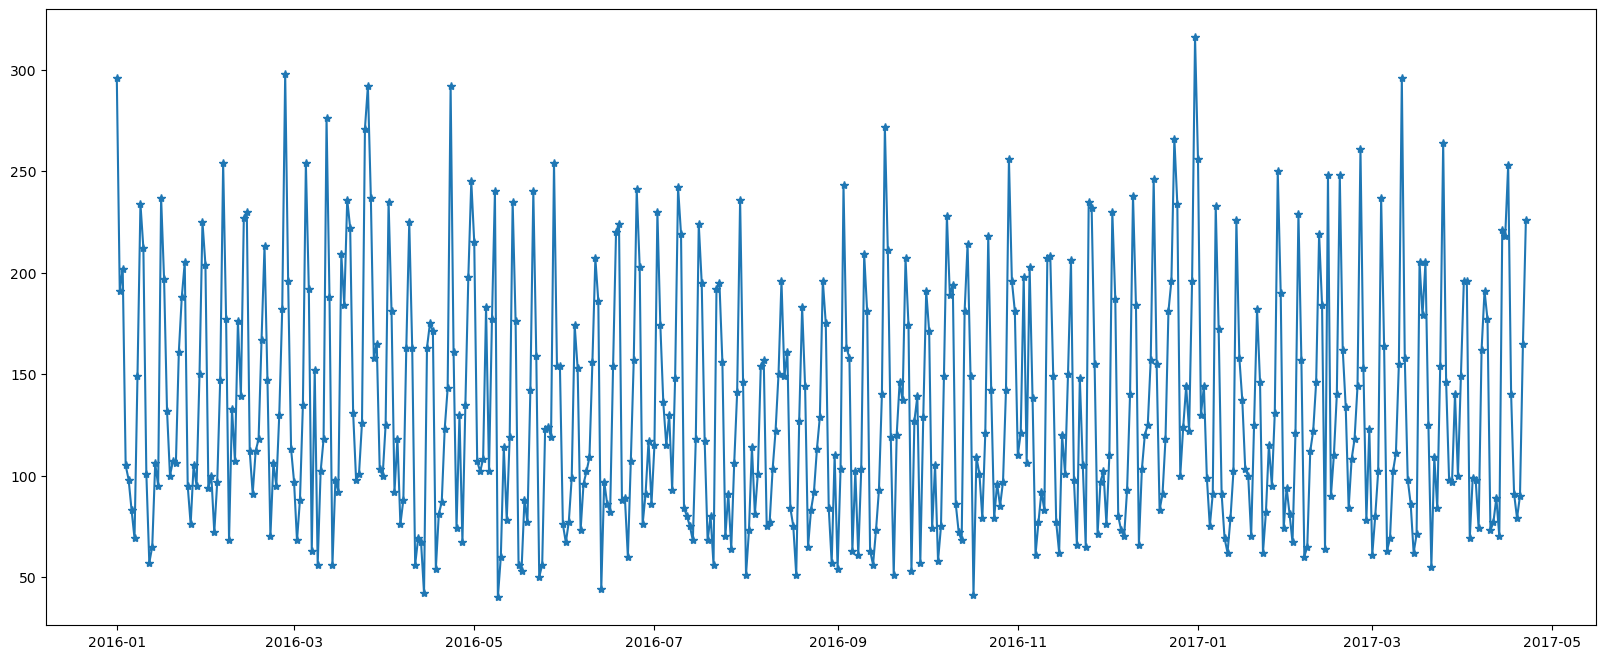

In [96]:
plt.plot(df.index, df['total'], '-*')
plt.show()

- it looks stationary

In [47]:
sm.tsa.stattools.adfuller(df['total'])[1]    # stationary

1.319377094694154e-06

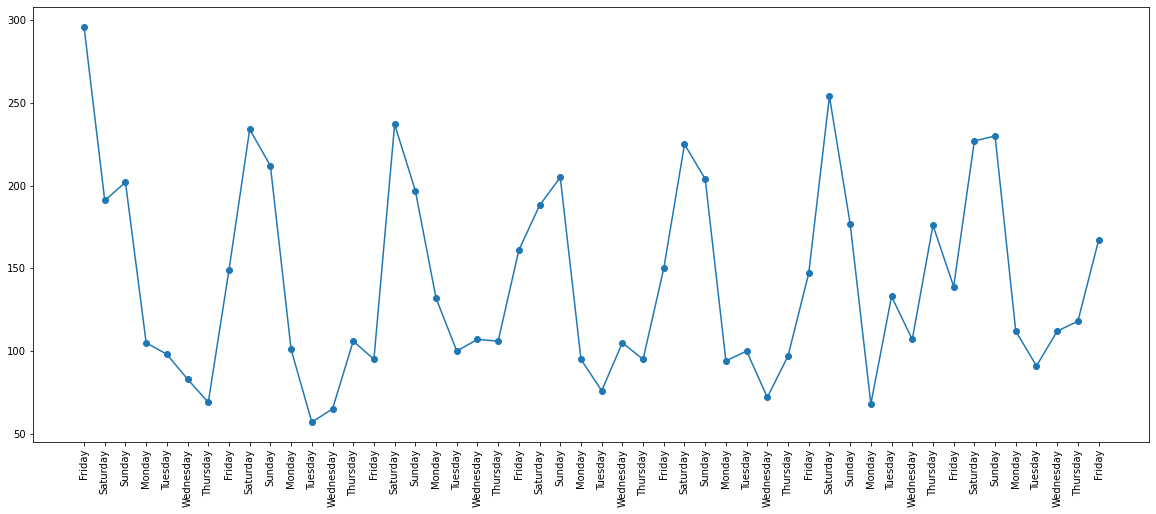

In [48]:
plt.plot(range(50),df['total'][:50], '-o')
plt.xticks(range(0,50), df['weekday'][:50],rotation = 90)  # let's just take the first 50 observations since it's very cluttered.
plt.show()

- It's daily data and it has weekly seasonality.

In [50]:
train = df.iloc[:436]
test = df.iloc[436:]

In [49]:
478-436  # 6 weeks of data in test.

42

In [51]:
# d = 0 cuz the time series is already stationary.
# S = 7 since weekly seasonality
model = SARIMAX(train['total'], order=(1,0,0), seasonal_order=(1,0,1,7))  # a simple model
results = model.fit(disp=False)
fc = results.forecast(42)        # out of sample forecast: you need to provide how many future points you want to predict.

- you can't compare AIC/BIC for this model with the model we created earlier cuz both are created on different data. Also, AIC and BIC depends on number of observations among other things.

In [53]:
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2155.511
Date:                             Mon, 04 Sep 2023   AIC                           4319.023
Time:                                     22:39:14   BIC                           4335.333
Sample:                                 01-01-2016   HQIC                          4325.460
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2194      0.043      5.067      0.000       0.135       0.304
ar.S.L7        0.9999      0.000   8030.250      0.000       1.000       1.000
ma.S.L7       -0.9405      0.023    -40.031      0.000      -0.987      -0.894
sigma2      1068.8497     54.344     19.668      0.000     962.338    1175.361
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):               106.77
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.77
Prob(H) (two-sided):                  0.61   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
start=len(train)    # we're starting with 436.
end=len(train)+len(test)-1   # we're not forecasting this for training data.
predictions = results.predict(start=start, end=end)      # in-sample prediction(on training data) and out-of-sample forecasting (this is the forecasting)

MAE : 25.159
RMSE : 31.97
MAPE: 20.212


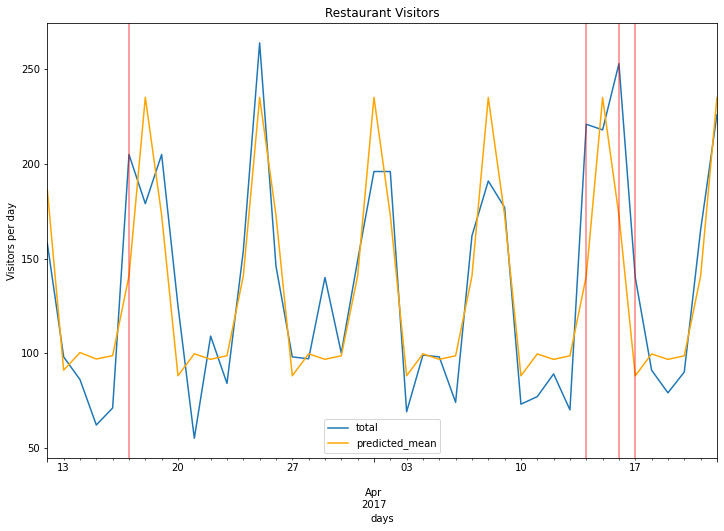

In [58]:
performance(test['total'], predictions)
# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5)

- There are some significant errors here.

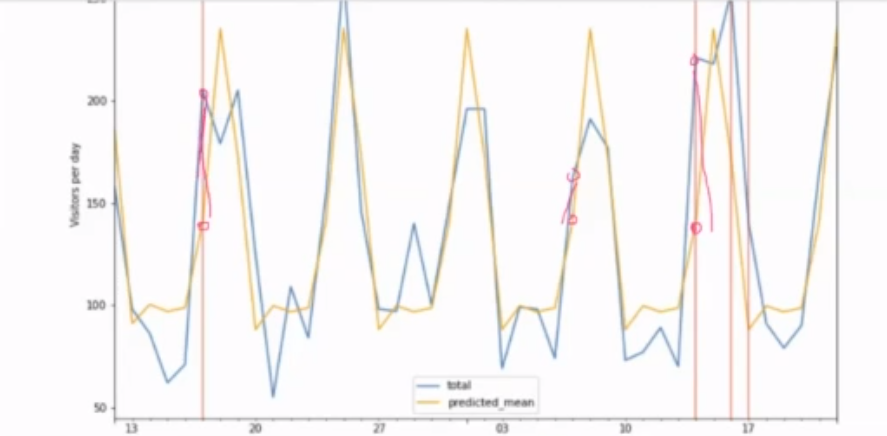

- As of now, there's no indicator of holiday(the red vertical lines). Including holiday as the exogenous variable could improve the data.

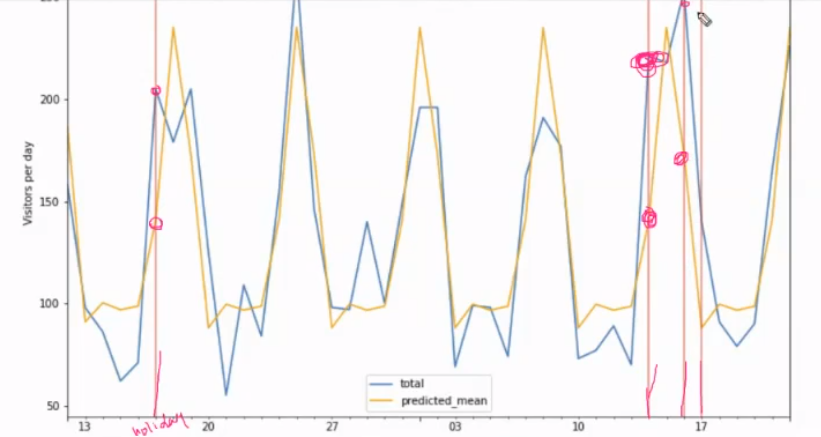

In [59]:
# we're not focusing too much on order and seasonal_order here.
# train['total'] is the endogenous variable. 'holiday' is the exog var.
model = SARIMAX(train['total'], exog=train['holiday'], order=(1,0,0),seasonal_order=(1,0,1,7))
results = model.fit(disp=False)

In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.062
Date:                             Mon, 04 Sep 2023   AIC                           4188.124
Time:                                     22:49:31   BIC                           4208.512
Sample:                                 01-01-2016   HQIC                          4196.170
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.5104      3.763     18.204      0.000      61.134      75.887
ar.L1          0.2115      0.044      4.804      0.000       0.125       0.298
ar.S.L7        0.9999   8.98e-05   1.11e+04      0.000       1.000       1.000
ma.S.L7       -0.9461      0.023    -41.630      0.000      -0.991      -0.902
sigma2       783.3939     45.147     17.352      0.000     694.908     871.880
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                20.24
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.23
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- AIC value has decreased. 

In [61]:
exog_forecast = test[['holiday']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

MAE : 18.904
RMSE : 23.264
MAPE: 16.254


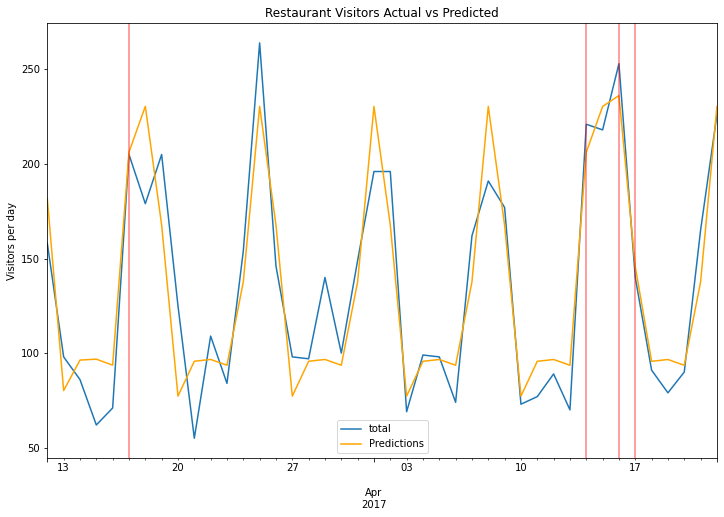

In [62]:
performance(test['total'], predictions)
# Plot predictions against known values
title='Restaurant Visitors Actual vs Predicted'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True, color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5);

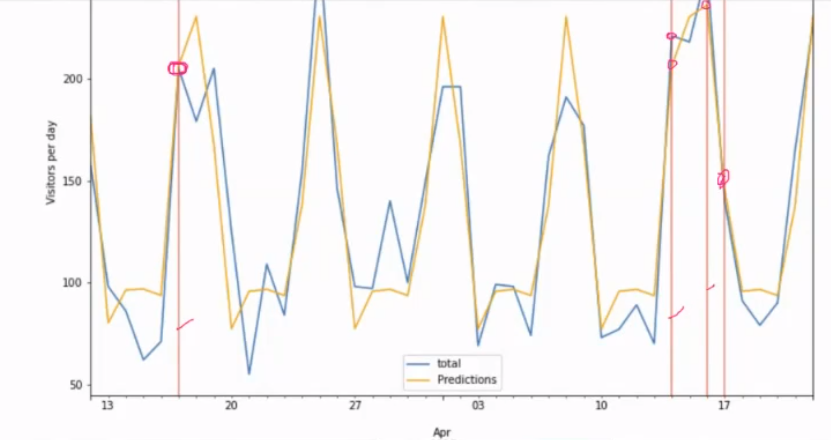

### Confidence Interval

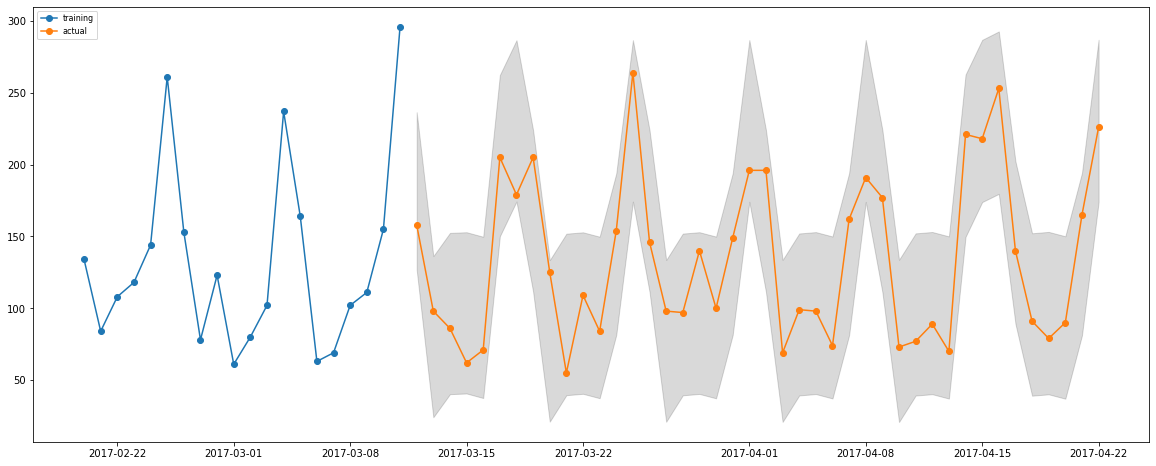

In [63]:
# we're taking lower and upper here.
# using get_forecast
# alpha by default is 0.5
# steps means future forecasts we're making
test[['lower', 'upper']] = results.get_forecast(steps=42, exog=exog_forecast).conf_int(alpha=0.05).values
test['pred'] = results.predict(steps=42, exog=exog_forecast).values[-42:]

plt.plot(train['total'][-20:], '-o', label='training')
plt.plot(test['total'], '-o', label='actual')
# plt.plot(test['pred'], '-o', label='prediction')
plt.fill_between(test.index, test['lower'], test['upper'], color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.show()

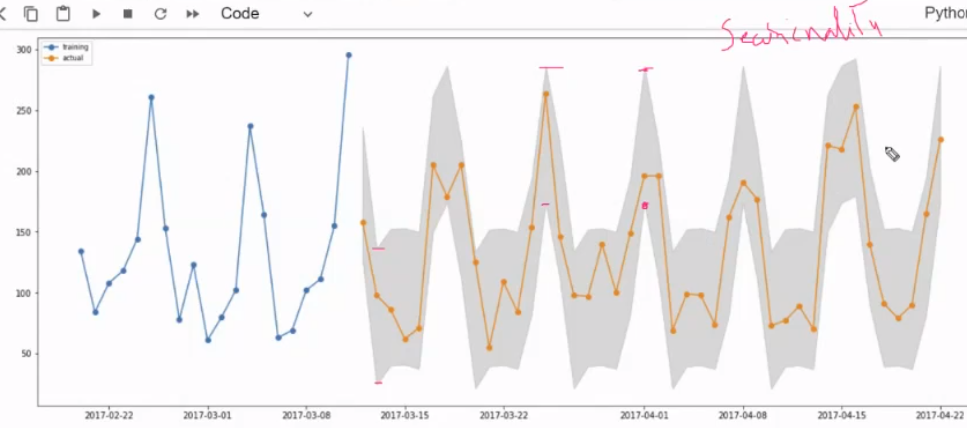

- It is giving consistently the same range of confidence for different points. That could be cuz we have strong seasonality in the data which ensures whatever the forecast is generated is good and their confidence interval remains same.

In [64]:
test

weekday  holiday  total       lower       upper        pred
date                                                                     
2017-03-12     Sunday        0  158.0  126.720297  236.441769  172.857606
2017-03-13     Monday        0   98.0   24.126285  136.274609   85.890355
2017-03-14    Tuesday        0   86.0   40.191852  152.447493   91.694825
2017-03-15  Wednesday        0   62.0   40.660980  152.921418   98.655410
2017-03-16   Thursday        0   71.0   37.507337  149.767961  159.171611
2017-03-17     Friday        1  205.0  150.092464  262.352491  118.644954
2017-03-18   Saturday        0  179.0  174.328933  286.588960  219.012344
2017-03-19     Sunday        0  205.0  111.501585  223.917644  169.332236
2017-03-20     Monday        0  125.0   21.051653  133.474686   78.264770
2017-03-21    Tuesday        0   55.0   39.479817  151.903162   88.851914
2017-03-22  Wednesday        0  109.0   40.439935  152.863292   91.561318
2017-03-23   Thursday        0   84.0   37.390015  149.813346   92.229811
2017-03-24     Friday        0  154.0   81.482704  193.905428  144.882129
2017-03-25   Saturday        0  264.0  174.226036  286.648760  224.821947
2017-03-26     Sunday        0  146.0  111.405372  223.983773  166.540551
2017-03-27     Monday        0   98.0   20.963626  133.548985   82.984230
2017-03-28    Tuesday        0   97.0   39.390211  151.975880  156.913081
2017-03-29  Wednesday        0  140.0   40.350253  152.935935  116.871345
2017-03-30   Thursday        0  100.0   37.300604  149.886259   89.179255
2017-03-31     Friday        0  149.0   81.389407  193.974457  142.394117
2017-04-01   Saturday        0  196.0  174.124565  286.709615  223.221556
2017-04-02     Sunday        0  196.0  111.309557  224.050032  173.605841
2017-04-03     Monday        0   69.0   20.875787  133.623208  145.812929
2017-04-04    Tuesday        0   99.0   39.300747  152.048479   93.629874
2017-04-05  Wednesday        0   98.0   40.260705  153.008449   95.218721
2017-04-06   Thursday        0   74.0   37.211325  149.959043   94.104130
2017-04-07     Friday        0  162.0   81.296242  194.043355  143.946167
2017-04-08   Saturday        0  191.0  174.023228  286.770341  225.388078
2017-04-09     Sunday        0  177.0  111.213874  224.116162  175.717933
2017-04-10     Monday        0   73.0   20.788078  133.697301   74.757648
2017-04-11    Tuesday        0   77.0   39.211415  152.120948   95.748743
2017-04-12  Wednesday        0   89.0   40.171288  153.080834  104.149785
2017-04-13   Thursday        0   70.0   37.122177  150.031696   85.448056
2017-04-14     Friday        1  221.0  149.713623  262.622538  135.902204
2017-04-15   Saturday        0  218.0  173.922024  286.830939  218.410488
2017-04-16     Sunday        1  253.0  179.628736  292.692576  169.405609
2017-04-17     Monday        1  140.0   89.210914  202.281678   77.255232
2017-04-18    Tuesday        0   91.0   39.122214  152.193288   94.040222
2017-04-19  Wednesday        0   79.0   40.082002  153.153089   90.393982
2017-04-20   Thursday        0   90.0   37.033160  150.104220   93.818604
2017-04-21     Friday        0  165.0   81.110307  194.180764  140.618456
2017-04-22   Saturday        0  226.0  173.820951  286.891408  230.604847

If you have any questions, get in touch with me [**here**](https://linktr.ee/khushalkumar31)